# PGA TOUR Analysis

## Objective
What statistical category correlates to the best performance results (wins and top 10s)

### My hypothesis
I think GIR because that would provide more scoring opportunities.

### Note about data set
I couldn't find individual tournament results with all the statistical categories so using annual averages and counts from 2010-2018 already compiled in a data set. Link: https://www.kaggle.com/jmpark746/pga-tour-data-2010-2018

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot') # I also like fivethirtyeight'
# plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14, 'font.family': 'sans'})

In [ ]:
%run '../src/main.py'

In [83]:
df = pd.read_csv('../data/pgaTourData.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

Looks like 27% of the objecst are missing the statistical categories (2312-1678=634, 634/2312=0.27)

In [4]:
df.describe()

Rounds  Fairway Percentage         Year  Avg Distance  \
count  1678.000000         1678.000000  2312.000000   1678.000000   
mean     78.711561           61.440560  2013.996107    290.807688   
std      14.274137            5.058845     2.581176      8.916631   
min      45.000000           43.020000  2010.000000    266.400000   
25%      69.000000           57.942500  2012.000000    284.900000   
50%      79.500000           61.430000  2014.000000    290.550000   
75%      89.000000           64.910000  2016.000000    296.400000   
max     120.000000           76.880000  2018.000000    319.700000   

               gir  Average Putts  Average Scrambling  Average Score  \
count  1678.000000    1678.000000         1678.000000    1678.000000   
mean     65.661675      29.163331           58.115638      70.921961   
std       2.745411       0.518468            3.384769       0.698305   
min      53.540000      27.510000           44.010000      68.698000   
25%      63.830000      28.810000           55.900000      70.494250   
50%      65.790000      29.140000           58.275000      70.902000   
75%      67.580000      29.520000           60.420000      71.342750   
max      73.520000      31.000000           69.330000      74.400000   

             Wins       Top 10  Average SG Putts  Average SG Total  \
count  293.000000  1458.000000       1678.000000       1678.000000   
mean     1.218430     2.781893          0.025641          0.148105   
std      0.573443     1.895094          0.343787          0.694923   
min      1.000000     1.000000         -1.475000         -3.209000   
25%      1.000000     1.000000         -0.187000         -0.254750   
50%      1.000000     2.000000          0.040000          0.147000   
75%      1.000000     4.000000          0.257000          0.568500   
max      5.000000    14.000000          1.130000          2.406000   

            SG:OTT       SG:APR       SG:ARG  
count  1678.000000  1678.000000  1678.000000  
mean      0.037759     0.065015     0.019974  
std       0.379892     0.380952     0.223361  
min      -1.717000    -1.680000    -0.930000  
25%      -0.190250    -0.180750    -0.123000  
50%       0.056000     0.081000     0.022000  
75%       0.291500     0.314500     0.175000  
max       1.485000     1.533000     0.660000

In [5]:
df.head()

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
0          29.93               60.67         69.617    868   NaN     5.0   
1          29.31               60.13         70.758  1,006   1.0     3.0   
2          29.12               62.27         70.432  1,020   NaN     3.0   
3          29.17               64.16         70.015    795   NaN     5.0   
4          29.11               59.23         71.038    421   NaN     3.0   

   Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
0            -0.207             1.153   0.427   0.960  -0.027  $2,680,487  
1            -0.058             0.337  -0.012   0.213   0.194  $2,485,203  
2             0.192             0.674   0.183   0.437  -0.137  $2,700,018  
3            -0.271             0.941   0.406   0.532   0.273  $1,986,608  
4             0.164             0.062  -0.227   0.099   0.026  $1,089,763

**Notes:**  
Will need to change NaN in wins columns to zero - probably topt tens as well.  
Do the shots gained stats go back to 2010? Not sure when tracking this stat began
Many columns missing 634 values
Need to add ranks for the statistical values - that way the comparison is where they rank in that statistic. 


**Possible improvements to the data set, or considerations in finding or building another:**  
Add years 2019-2021  
Would like to have number of events and cuts made.  
Would like a tournament by tournament breakdown to check where each tournament winner ranked in each of the statistical categories.  


In [6]:
df['Rounds'].unique()

array([ 60., 109.,  93.,  78., 103.,  94.,  77.,  50., 104.,  82.,  98.,
        75.,  86.,  65.,  83.,  87., 107.,  97.,  66.,  73.,  89.,  81.,
        85.,  70.,  84.,  92.,  90.,  51.,  74.,  67.,  88.,  62.,  69.,
       108.,  99.,  91.,  96.,  56.,  64.,  71.,  72., 101.,  95., 102.,
        58.,  55.,  63.,  80.,  68.,  79.,  76., 105.,  53., 110.,  54.,
        52., 100.,  61.,  57., 106., 112.,  59., 115., 113., 120., 111.,
        49.,  48.,  46.,  45., 116., 114.,  nan])

In [20]:
df[df['Rounds'].isnull()]

Player Name  Rounds  Fairway Percentage  Year  Avg Distance  gir  \
1678       Sergio Garcia     NaN                 NaN  2018           NaN  NaN   
1679      Steve Stricker     NaN                 NaN  2018           NaN  NaN   
1680      Thomas Pieters     NaN                 NaN  2018           NaN  NaN   
1681         Ross Fisher     NaN                 NaN  2018           NaN  NaN   
1682       Graham DeLaet     NaN                 NaN  2018           NaN  NaN   
...                  ...     ...                 ...   ...           ...  ...   
2307        Carl Paulson     NaN                 NaN  2012           NaN  NaN   
2308      Peter Tomasulo     NaN                 NaN  2012           NaN  NaN   
2309        Marc Turnesa     NaN                 NaN  2010           NaN  NaN   
2310     Jesper Parnevik     NaN                 NaN  2010           NaN  NaN   
2311  Jim Gallagher, Jr.     NaN                 NaN  2010           NaN  NaN   

      Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
1678            NaN                 NaN            NaN    362   NaN     3.0   
1679            NaN                 NaN            NaN    274   NaN     NaN   
1680            NaN                 NaN            NaN    260   NaN     1.0   
1681            NaN                 NaN            NaN    119   NaN     NaN   
1682            NaN                 NaN            NaN    111   NaN     1.0   
...             ...                 ...            ...    ...   ...     ...   
2307            NaN                 NaN            NaN    NaN   NaN     NaN   
2308            NaN                 NaN            NaN    NaN   NaN     NaN   
2309            NaN                 NaN            NaN    NaN   NaN     NaN   
2310            NaN                 NaN            NaN    NaN   NaN     NaN   
2311            NaN                 NaN            NaN    NaN   NaN     NaN   

      Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG     Money  
1678               NaN               NaN     NaN     NaN     NaN  $878,354  
1679               NaN               NaN     NaN     NaN     NaN  $582,566  
1680               NaN               NaN     NaN     NaN     NaN  $813,227  
1681               NaN               NaN     NaN     NaN     NaN  $412,954  
1682               NaN               NaN     NaN     NaN     NaN  $251,630  
...                ...               ...     ...     ...     ...       ...  
2307               NaN               NaN     NaN     NaN     NaN   $16,943  
2308               NaN               NaN     NaN     NaN     NaN   $12,827  
2309               NaN               NaN     NaN     NaN     NaN    10,159  
2310               NaN               NaN     NaN     NaN     NaN     9,165  
2311               NaN               NaN     NaN     NaN     NaN     6,552  

[634 rows x 18 columns]

Data is missing even from 2018, and even for players that had top 10 finishes. Garcia had 3 that year. 

In [28]:
df[df.Year==2010].count()

Player Name           251
Rounds                192
Fairway Percentage    192
Year                  251
Avg Distance          192
gir                   192
Average Putts         192
Average Scrambling    192
Average Score         192
Points                247
Wins                   29
Top 10                171
Average SG Putts      192
Average SG Total      192
SG:OTT                192
SG:APR                192
SG:ARG                192
Money                 248
dtype: int64

In [27]:
df[(df.Year==2010) & (df.Rounds.isnull())].count()

Player Name           59
Rounds                 0
Fairway Percentage     0
Year                  59
Avg Distance           0
gir                    0
Average Putts          0
Average Scrambling     0
Average Score          0
Points                55
Wins                   3
Top 10                12
Average SG Putts       0
Average SG Total       0
SG:OTT                 0
SG:APR                 0
SG:ARG                 0
Money                 56
dtype: int64

In 2010 there were 3 wins and 12 top 10s that don't have any other statistics to compare

In [30]:
df[df.Rounds.isnull()].count()

Player Name           634
Rounds                  0
Fairway Percentage      0
Year                  634
Avg Distance            0
gir                     0
Average Putts           0
Average Scrambling      0
Average Score           0
Points                622
Wins                   10
Top 10                105
Average SG Putts        0
Average SG Total        0
SG:OTT                  0
SG:APR                  0
SG:ARG                  0
Money                 626
dtype: int64

In total there are 10 wins and 105 top 10s that we don't have statistical categories to compare with.   
There are a total of 293 wins and 1458 top 10s over the data set so this is a small portion (10/293 = 0.034 and 105/1458 = 0.072)

<AxesSubplot:>

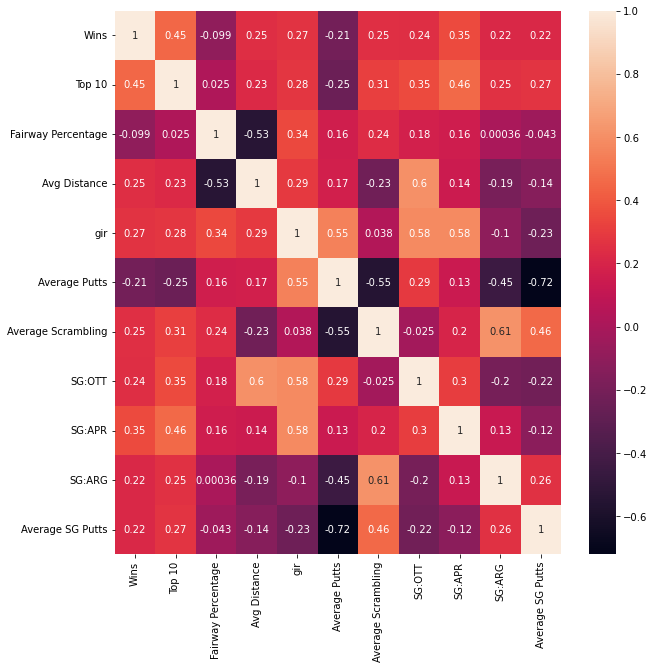

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['Wins','Top 10','Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'SG:OTT',
       'SG:APR', 'SG:ARG','Average SG Putts']].corr(),ax=ax,annot=True)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['Wins','Top 10','Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'SG:OTT',
       'SG:APR', 'SG:ARG','Average SG Putts','Average SG Total']].corr(),ax=ax,annot=True)

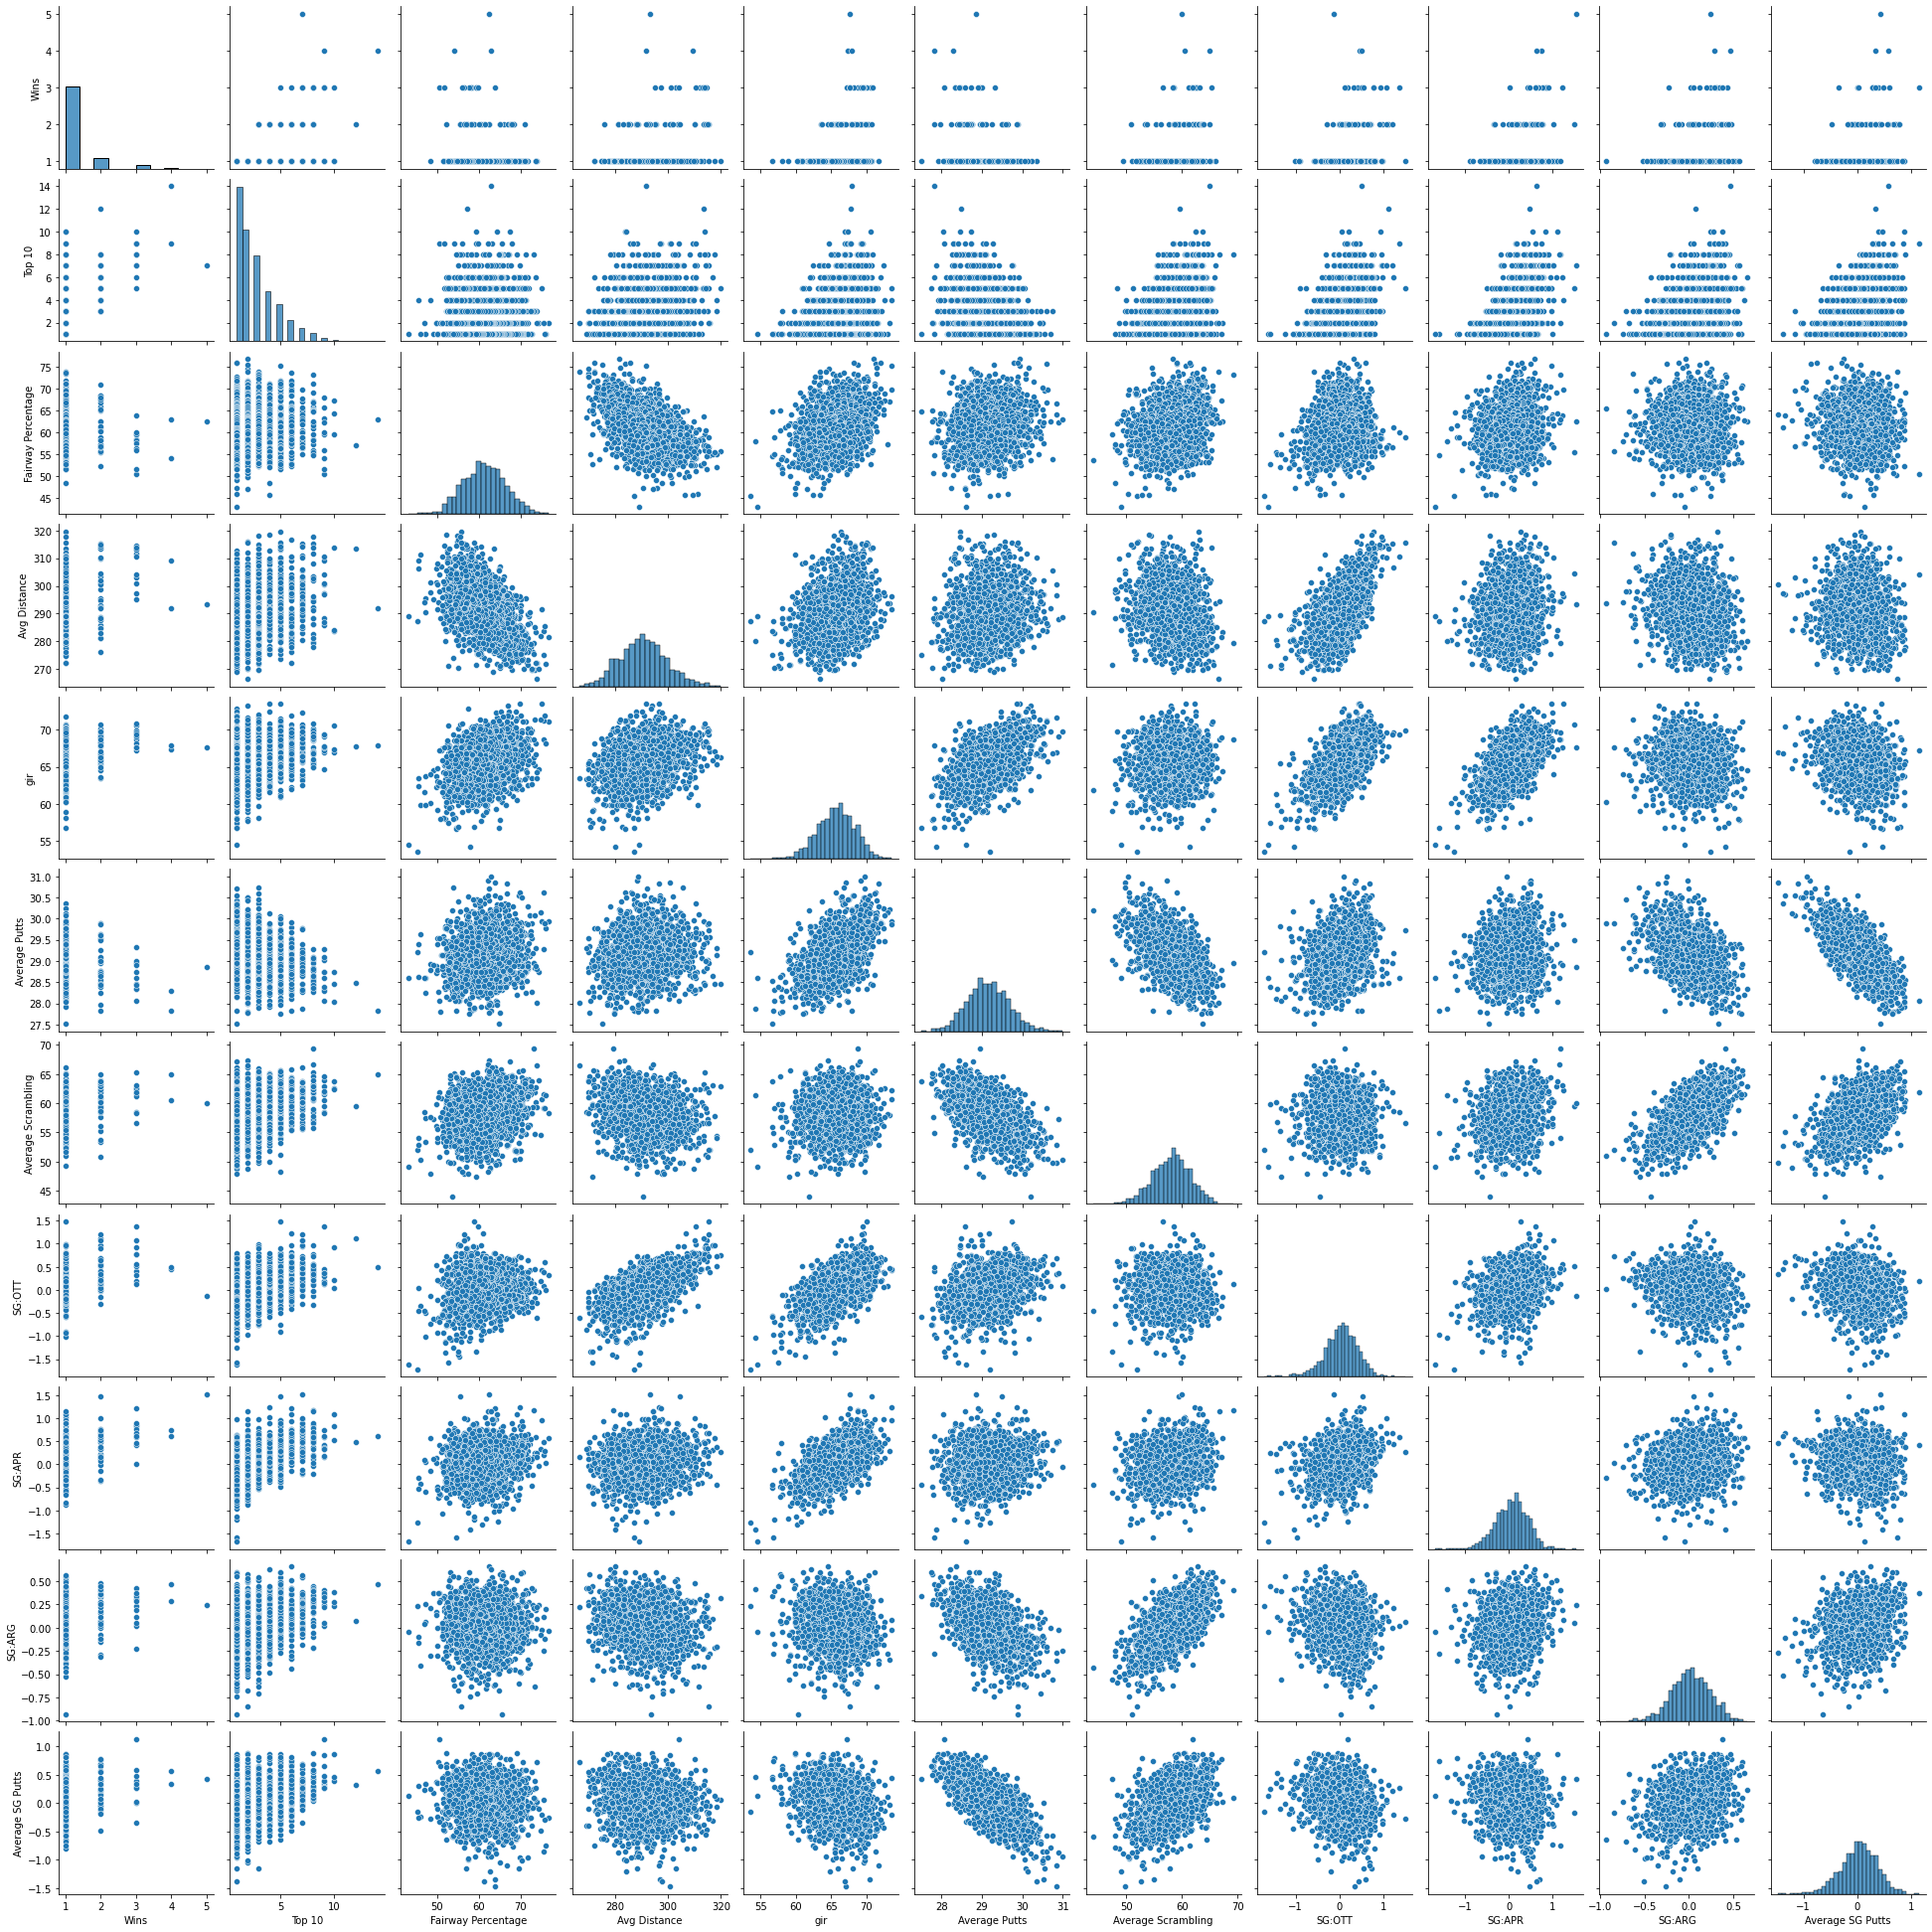

In [23]:
sns.pairplot(df[['Wins','Top 10','Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'SG:OTT',
       'SG:APR', 'SG:ARG','Average SG Putts']])

In [210]:
print('Players: ',len(df['Player Name'].unique()))
print('Players with a Win: ',len(df[df.Wins>0]['Player Name'].unique()))
print('Players with a top 10: ',len(df[df['Top 10']>0]['Player Name'].unique()))
print('Players with multiple Wins in a year: ',len(df[df.Wins>1]['Player Name'].unique()))


Players:  526
Players with a Win:  157
Players with a top 10:  391
Players with multiple Wins in a year:  29


In [220]:

print(len(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]))
print(len(df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]['Player Name'].unique()))

73
42


In [212]:
a = df[df.Wins>0][['Player Name','Wins','Top 10']].groupby('Player Name').sum().sort_values(by='Wins',ascending=False)
a[a.Wins>1]

Wins  Top 10
Player Name                 
Dustin Johnson  13.0    59.0
Bubba Watson    12.0    34.0
Jason Day       10.0    28.0
Jordan Spieth   10.0    35.0
Rory McIlroy     9.0    32.0
...              ...     ...
Fabián Gómez     2.0     5.0
Daniel Berger    2.0    11.0
Russell Knox     2.0     4.0
Sangmoon Bae     2.0     6.0
Geoff Ogilvy     2.0     2.0

[78 rows x 2 columns]

In [11]:
df[df.Wins>0][['Player Name','Wins','Top 10']].groupby('Player Name').sum().sort_values(by='Top 10',ascending=False)

Wins  Top 10
Player Name                  
Dustin Johnson   13.0    59.0
Justin Rose       8.0    38.0
Brandt Snedeker   7.0    36.0
Jordan Spieth    10.0    35.0
Bubba Watson     12.0    34.0
...               ...     ...
Matt Jones        1.0     1.0
Michael Bradley   1.0     1.0
Michael Kim       1.0     1.0
Nick Taylor       1.0     1.0
Ángel Cabrera     1.0     1.0

[157 rows x 2 columns]

In [10]:
df[df.Wins==df.Wins.max()]

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
997  Tiger Woods    61.0                62.5  2013         293.2  67.59   

     Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
997          28.85                60.0         68.944  3,059   5.0     7.0   

     Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
997             0.426             2.064  -0.142   1.533   0.247  $8,553,439

In [12]:
df[df['Top 10']==df['Top 10'].max()]

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
647  Jordan Spieth    91.0               62.91  2015         291.8  67.87   

     Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
647          27.82               65.03         68.938  4,169   4.0    14.0   

     Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG        Money  
647             0.571             2.154   0.494   0.618   0.471  $12,030,465

In [17]:
df[df.Wins>0].sort_values(by='Top 10',ascending=False).head(10)

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
647    Jordan Spieth    91.0               62.91  2015         291.8  67.87   
520   Dustin Johnson    87.0               57.17  2016         313.6  67.82   
771      Matt Kuchar    91.0               67.37  2014         283.8  66.92   
1356     Luke Donald    73.0               64.29  2011         284.1  67.33   
124   Dustin Johnson    77.0               59.46  2018         314.0  70.57   
563        Jason Day    76.0               50.46  2016         304.2  67.23   
861     Rory McIlroy    66.0               59.93  2014         310.5  69.44   
251    Rickie Fowler    78.0               63.29  2017         300.5  66.98   
927     Jimmy Walker    98.0               51.67  2014         301.0  67.59   
361    Justin Thomas    86.0               54.09  2017         309.3  67.33   

      Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
647           27.82               65.03         68.938  4,169   4.0    14.0   
520           28.49               59.58         69.172  2,701   2.0    12.0   
771           28.74               62.40         69.416  1,921   1.0    10.0   
1356          28.03               63.71         68.861  1,856   1.0    10.0   
124           28.47               62.50         68.698  2,717   3.0    10.0   
563           28.06               61.92         69.313  2,735   3.0     9.0   
861           28.59               58.52         68.827  2,582   3.0     9.0   
251           28.32               62.85         69.083  1,832   1.0     9.0   
927           28.73               58.39         69.789  2,493   3.0     9.0   
361           28.29               60.54         69.359  2,689   4.0     9.0   

      Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG        Money  
647              0.571             2.154   0.494   0.618   0.471  $12,030,465  
520              0.328             1.993   1.117   0.477   0.070   $9,365,185  
771              0.457             1.573   0.210   0.527   0.380   $4,695,515  
1356             0.870             2.278   0.040   1.094   0.273   $6,683,214  
124              0.385             2.372   0.919   0.829   0.238   $8,457,352  
563              1.130             2.118   0.186   0.426   0.375   $8,045,112  
861              0.274             2.266   1.367   0.602   0.022   $8,280,096  
251              0.852             1.875   0.378   0.408   0.349   $6,083,197  
927              0.479             1.253   0.119   0.608   0.048   $5,787,016  
361              0.332             1.724   0.452   0.738   0.289   $9,921,560

In [18]:
df[df.Wins>0].sort_values(by='Wins',ascending=False).head(10)

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
997      Tiger Woods    61.0               62.50  2013         293.2  67.59   
361    Justin Thomas    86.0               54.09  2017         309.3  67.33   
647    Jordan Spieth    91.0               62.91  2015         291.8  67.87   
729        Jason Day    75.0               55.94  2015         313.7  70.83   
141     Bubba Watson    90.0               58.27  2018         313.1  68.21   
137    Justin Thomas    91.0               58.41  2018         311.8  68.77   
1163     Tiger Woods    69.0               63.93  2012         297.4  67.58   
124   Dustin Johnson    77.0               59.46  2018         314.0  70.57   
563        Jason Day    76.0               50.46  2016         304.2  67.23   
927     Jimmy Walker    98.0               51.67  2014         301.0  67.59   

      Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
997           28.85               60.00         68.944  3,059   5.0     7.0   
361           28.29               60.54         69.359  2,689   4.0     9.0   
647           27.82               65.03         68.938  4,169   4.0    14.0   
729           28.44               65.34         69.161  2,459   3.0     8.0   
141           29.33               56.64         70.384  1,879   3.0     5.0   
137           28.33               62.47         69.118  2,634   3.0     8.0   
1163          28.91               63.17         68.904  2,269   3.0     6.0   
124           28.47               62.50         68.698  2,717   3.0    10.0   
563           28.06               61.92         69.313  2,735   3.0     9.0   
927           28.73               58.39         69.789  2,493   3.0     9.0   

      Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG        Money  
997              0.426             2.064  -0.142   1.533   0.247   $8,553,439  
361              0.332             1.724   0.452   0.738   0.289   $9,921,560  
647              0.571             2.154   0.494   0.618   0.471  $12,030,465  
729              0.586             2.106   0.772   0.461   0.287   $9,403,330  
141              0.001             0.555   0.780   0.005  -0.231   $5,793,748  
137              0.272             1.835   0.408   0.844   0.311   $8,694,821  
1163             0.339             2.310   0.553   1.224   0.194   $6,133,158  
124              0.385             2.372   0.919   0.829   0.238   $8,457,352  
563              1.130             2.118   0.186   0.426   0.375   $8,045,112  
927              0.479             1.253   0.119   0.608   0.048   $5,787,016

--------------------

## Clean data

In [38]:
def change_nan_to_0(df,column_list):
    df[column_list] = df[column_list].fillna(0)
    return df


In [84]:
df = change_nan_to_0(df,['Wins','Top 10'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                2312 non-null   float64
 11  Top 10              2312 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [44]:
df.sort_values(by='Top 10',ascending=False).tail(10)

Player Name  Rounds  Fairway Percentage  Year  Avg Distance  \
13       David Lingmerth    82.0               68.93  2018         285.4   
1615           Greg Owen    69.0               61.46  2010         291.4   
1616      Andrew McLardy    52.0               61.43  2010         289.9   
1624           Ted Purdy    86.0               60.61  2010         290.8   
1626     Michael Bradley    77.0               60.37  2010         281.5   
1634        Chris Wilson    65.0               59.93  2010         291.7   
1638          Brad Faxon    58.0               59.47  2010         271.4   
1641       Cameron Percy    73.0               58.93  2010         294.0   
1642    Cameron Tringale    55.0               58.71  2010         294.5   
2311  Jim Gallagher, Jr.     NaN                 NaN  2010           NaN   

        gir  Average Putts  Average Scrambling  Average Score Points  Wins  \
13    63.03          28.50               58.57         71.043    274   0.0   
1615  69.00          30.10               52.73         71.770    184   0.0   
1616  65.97          29.69               53.40         72.217     23   0.0   
1624  63.96          29.61               52.44         71.824    244   0.0   
1626  68.65          29.62               59.47         71.498    306   0.0   
1634  63.28          29.56               53.85         72.682     58   0.0   
1638  59.05          29.02               47.49         73.116     39   0.0   
1641  70.42          30.13               56.91         71.622    206   0.0   
1642  70.18          30.45               53.23         71.598    107   0.0   
2311    NaN            NaN                 NaN            NaN    NaN   0.0   

      Top 10  Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG  \
13       0.0             0.229            -0.007   0.006  -0.160  -0.081   
1615     0.0            -0.641            -0.745   0.200  -0.103  -0.205   
1616     0.0            -0.172            -1.005   0.079  -0.536  -0.375   
1624     0.0            -0.114            -0.892  -0.124  -0.405  -0.256   
1626     0.0            -0.084            -0.392  -0.676   0.219   0.147   
1634     0.0            -0.668            -1.631  -0.112  -0.629  -0.221   
1638     0.0             0.426            -2.093  -1.343  -0.622  -0.553   
1641     0.0            -0.491            -0.236  -0.128   0.589  -0.206   
1642     0.0            -0.711            -0.465   0.131  -0.055   0.167   
2311     0.0               NaN               NaN     NaN     NaN     NaN   

         Money  
13    $616,758  
1615   268,835  
1616    53,106  
1624   307,677  
1626   360,845  
1634    76,481  
1638    55,482  
1641   620,262  
1642   302,618  
2311     6,552

## Add ranks to statistical categories

For average putts and and average score lower is better, for everything else higher is better
For the lower is better ones ```ascending=True``` in ```.rank()``` and all other ```ascending=False```


In [77]:
df['win_rank'] = df.groupby('Year')['Wins'].rank(method="min",ascending=False)
df['gir_rank'] = df.groupby('Year')['gir'].rank(method='min',ascending=False)
df['putt_rank'] = df.groupby('Year')['Average Putts'].rank(method='min',ascending=True)
df['sg_putt_rank'] = df.groupby('Year')['Average SG Putts'].rank(method='min',ascending=False)
df[['Player Name','Year','Wins','win_rank','gir','gir_rank','Average Putts','putt_rank','Average SG Putts','sg_putt_rank']].head()

Player Name  Year  Wins  win_rank    gir  gir_rank  Average Putts  \
0  Henrik Stenson  2018   0.0      35.0  73.51       1.0          29.93   
1     Ryan Armour  2018   1.0       9.0  68.22      56.0          29.31   
2     Chez Reavie  2018   0.0      35.0  68.67      47.0          29.12   
3      Ryan Moore  2018   0.0      35.0  68.80      44.0          29.17   
4    Brian Stuard  2018   0.0      35.0  67.12      83.0          29.11   

   putt_rank  Average SG Putts  sg_putt_rank  
0      183.0            -0.207         157.0  
1      124.0            -0.058         129.0  
2       90.0             0.192          67.0  
3      101.0            -0.271         163.0  
4       89.0             0.164          72.0

In [85]:
df.columns.get_loc('Wins')
df.insert(df.columns.get_loc('Wins')+1,'win_rank', df.groupby('Year')['Wins'].rank(method="min",ascending=False))
df.head()

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  win_rank  \
0          29.93               60.67         69.617    868   0.0      35.0   
1          29.31               60.13         70.758  1,006   1.0       9.0   
2          29.12               62.27         70.432  1,020   0.0      35.0   
3          29.17               64.16         70.015    795   0.0      35.0   
4          29.11               59.23         71.038    421   0.0      35.0   

   Top 10  Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG  \
0     5.0            -0.207             1.153   0.427   0.960  -0.027   
1     3.0            -0.058             0.337  -0.012   0.213   0.194   
2     3.0             0.192             0.674   0.183   0.437  -0.137   
3     5.0            -0.271             0.941   0.406   0.532   0.273   
4     3.0             0.164             0.062  -0.227   0.099   0.026   

        Money  
0  $2,680,487  
1  $2,485,203  
2  $2,700,018  
3  $1,986,608  
4  $1,089,763

In [ ]:
rank_column_names = {}

In [111]:
def add_rank_column(df,column,is_ascending=False):
    df.insert(df.columns.get_loc(column)+1,f'{column} rank', df.groupby('Year')[column].rank(method="min",ascending=is_ascending))
        
for column in df.columns:
    if column == 'Player Name' or column == 'Year':
        continue
    elif column == 'Average Putts' or column == 'Average Score':
        add_rank_column(df,column,True)
    else:
        add_rank_column(df,column)

In [112]:
df.head()

Player Name  Rounds  Rounds rank  Fairway Percentage  \
0  Henrik Stenson    60.0        177.0               75.19   
1     Ryan Armour   109.0          2.0               73.58   
2     Chez Reavie    93.0         42.0               72.24   
3      Ryan Moore    78.0        109.0               71.94   
4    Brian Stuard   103.0         10.0               71.44   

   Fairway Percentage rank  Year  Avg Distance  Avg Distance rank    gir  \
0                      1.0  2018         291.5              139.0  73.51   
1                      2.0  2018         283.5              185.0  68.22   
2                      3.0  2018         286.5              173.0  68.67   
3                      4.0  2018         289.2              163.0  68.80   
4                      5.0  2018         278.9              193.0  67.12   

   gir rank  ...  Average SG Total  Average SG Total rank  SG:OTT  \
0       1.0  ...             1.153                   14.0   0.427   
1      56.0  ...             0.337                   75.0  -0.012   
2      47.0  ...             0.674                   45.0   0.183   
3      44.0  ...             0.941                   25.0   0.406   
4      83.0  ...             0.062                  115.0  -0.227   

   SG:OTT rank  SG:APR  SG:APR rank SG:ARG  SG:ARG rank       Money  \
0         26.0   0.960          1.0 -0.027        113.0  $2,680,487   
1        116.0   0.213         70.0  0.194         43.0  $2,485,203   
2         72.0   0.437         29.0 -0.137        150.0  $2,700,018   
3         29.0   0.532         16.0  0.273         24.0  $1,986,608   
4        155.0   0.099         84.0  0.026         93.0  $1,089,763   

   Money rank  
0       161.0  
1       165.0  
2       158.0  
3       202.0  
4       255.0  

[5 rows x 36 columns]

May want to look at percentiles

In [88]:
df.groupby('Year')['Wins'].rank(ascending=True,pct=True)

0       0.436782
1       0.921456
2       0.436782
3       0.436782
4       0.436782
          ...   
2307    0.442529
2308    0.442529
2309    0.444223
2310    0.444223
2311    0.444223
Name: Wins, Length: 2312, dtype: float64

In [89]:
df[['Player Name','Year','Wins','win_rank']].sort_values(by=['Year','win_rank'],ascending=(False,True)).head(50)

Player Name  Year  Wins  win_rank
124      Dustin Johnson  2018   3.0       1.0
137       Justin Thomas  2018   3.0       1.0
141        Bubba Watson  2018   3.0       1.0
32          Justin Rose  2018   2.0       4.0
46   Francesco Molinari  2018   2.0       4.0
140           Jason Day  2018   2.0       4.0
154       Brooks Koepka  2018   2.0       4.0
164      Patton Kizzire  2018   2.0       4.0
1           Ryan Armour  2018   1.0       9.0
16       Billy Horschel  2018   1.0       9.0
22      Ted Potter, Jr.  2018   1.0       9.0
23          Austin Cook  2018   1.0       9.0
27          Ian Poulter  2018   1.0       9.0
35         Scott Piercy  2018   1.0       9.0
38      Satoshi Kodaira  2018   1.0       9.0
42            Pat Perez  2018   1.0       9.0
58        Brice Garnett  2018   1.0       9.0
61             Kevin Na  2018   1.0       9.0
66        Gary Woodland  2018   1.0       9.0
72           Aaron Wise  2018   1.0       9.0
77           Paul Casey  2018   1.0       9.0
80         Troy Merritt  2018   1.0       9.0
81        Andrew Landry  2018   1.0       9.0
83      Brandt Snedeker  2018   1.0       9.0
89         Webb Simpson  2018   1.0       9.0
91    Bryson DeChambeau  2018   1.0       9.0
97      Patrick Cantlay  2018   1.0       9.0
110      Brendan Steele  2018   1.0       9.0
112       Andrew Putnam  2018   1.0       9.0
128            Jon Rahm  2018   1.0       9.0
162        Rory McIlroy  2018   1.0       9.0
172        Patrick Reed  2018   1.0       9.0
176         Michael Kim  2018   1.0       9.0
188      Phil Mickelson  2018   1.0       9.0
0        Henrik Stenson  2018   0.0      35.0
2           Chez Reavie  2018   0.0      35.0
3            Ryan Moore  2018   0.0      35.0
4          Brian Stuard  2018   0.0      35.0
5             Brian Gay  2018   0.0      35.0
6          Kyle Stanley  2018   0.0      35.0
7       Emiliano Grillo  2018   0.0      35.0
8        Russell Henley  2018   0.0      35.0
9             Jim Furyk  2018   0.0      35.0
10     Steve Wheatcroft  2018   0.0      35.0
11      Kevin Streelman  2018   0.0      35.0
12             C.T. Pan  2018   0.0      35.0
13      David Lingmerth  2018   0.0      35.0
14       Keegan Bradley  2018   0.0      35.0
15   Rafa Cabrera Bello  2018   0.0      35.0
17         Russell Knox  2018   0.0      35.0

In [107]:
# may want to change column names 
test = {column: column.replace(' ','_').replace(':','_').lower() for column in df.columns}
test

{'Player Name': 'player_name',
 'Rounds': 'rounds',
 'Fairway Percentage': 'fairway_percentage',
 'Year': 'year',
 'Avg Distance': 'avg_distance',
 'gir': 'gir',
 'Average Putts': 'average_putts',
 'Average Scrambling': 'average_scrambling',
 'Average Score': 'average_score',
 'Points': 'points',
 'Wins': 'wins',
 'win_rank': 'win_rank',
 'Top 10': 'top_10',
 'Average SG Putts': 'average_sg_putts',
 'Average SG Total': 'average_sg_total',
 'SG:OTT': 'sg_ott',
 'SG:APR': 'sg_apr',
 'SG:ARG': 'sg_arg',
 'Money': 'money'}

In [2]:
# start clean
%run '../src/clean.py'

In [114]:
df.head()

Player Name  Year  Wins  Wins rank  Top 10  Top 10 rank  \
0  Henrik Stenson  2018   0.0       35.0     5.0         14.0   
1     Ryan Armour  2018   1.0        9.0     3.0         59.0   
2     Chez Reavie  2018   0.0       35.0     3.0         59.0   
3      Ryan Moore  2018   0.0       35.0     5.0         14.0   
4    Brian Stuard  2018   0.0       35.0     3.0         59.0   

   Fairway Percentage  Fairway Percentage rank  Avg Distance  \
0               75.19                      1.0         291.5   
1               73.58                      2.0         283.5   
2               72.24                      3.0         286.5   
3               71.94                      4.0         289.2   
4               71.44                      5.0         278.9   

   Avg Distance rank  ...  SG:OTT  SG:OTT rank  SG:APR  SG:APR rank  SG:ARG  \
0              139.0  ...   0.427         26.0   0.960          1.0  -0.027   
1              185.0  ...  -0.012        116.0   0.213         70.0   0.194   
2              173.0  ...   0.183         72.0   0.437         29.0  -0.137   
3              163.0  ...   0.406         29.0   0.532         16.0   0.273   
4              193.0  ...  -0.227        155.0   0.099         84.0   0.026   

   SG:ARG rank  Average SG Putts  Average SG Putts rank  Average SG Total  \
0        113.0            -0.207                  157.0             1.153   
1         43.0            -0.058                  129.0             0.337   
2        150.0             0.192                   67.0             0.674   
3         24.0            -0.271                  163.0             0.941   
4         93.0             0.164                   72.0             0.062   

   Average SG Total rank  
0                   14.0  
1                   75.0  
2                   45.0  
3                   25.0  
4                  115.0  

[5 rows x 28 columns]

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.drop(['Player Name','Year'],axis=1).corr(),annot=True,ax=ax)

<AxesSubplot:>

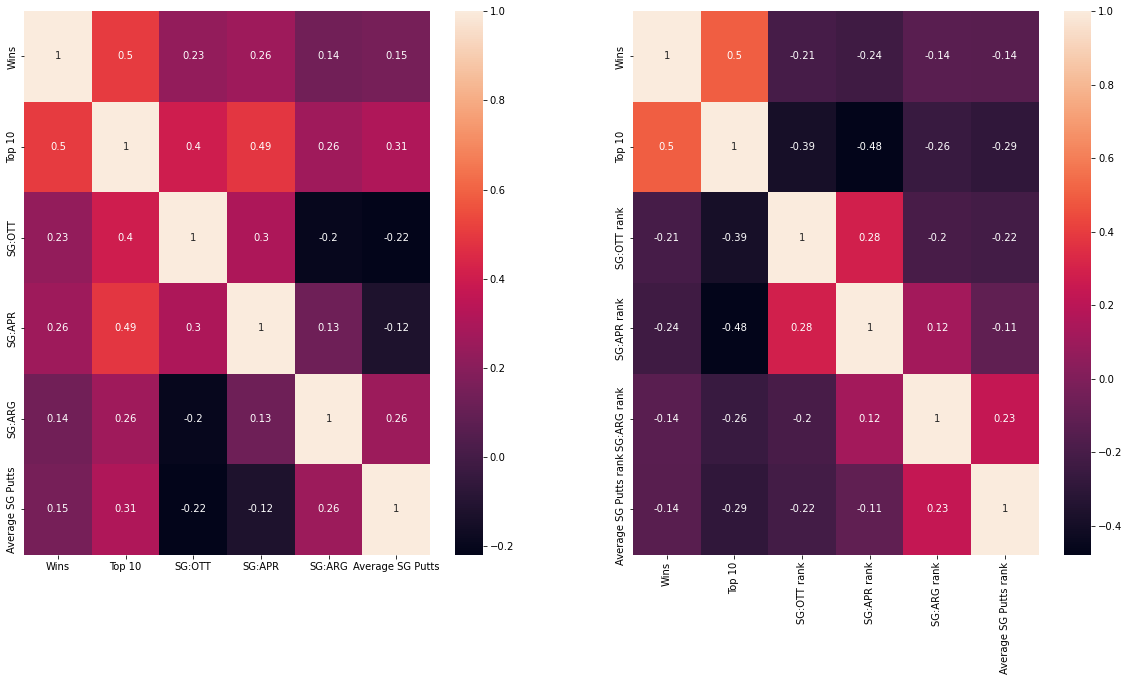

In [6]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(df[['Wins','Top 10','SG:OTT',
       'SG:APR', 'SG:ARG','Average SG Putts']].corr(),ax=ax[0],annot=True)
sns.heatmap(df[['Wins','Top 10','SG:OTT rank',
       'SG:APR rank', 'SG:ARG rank','Average SG Putts rank']].corr(),ax=ax[1],annot=True)

<AxesSubplot:>

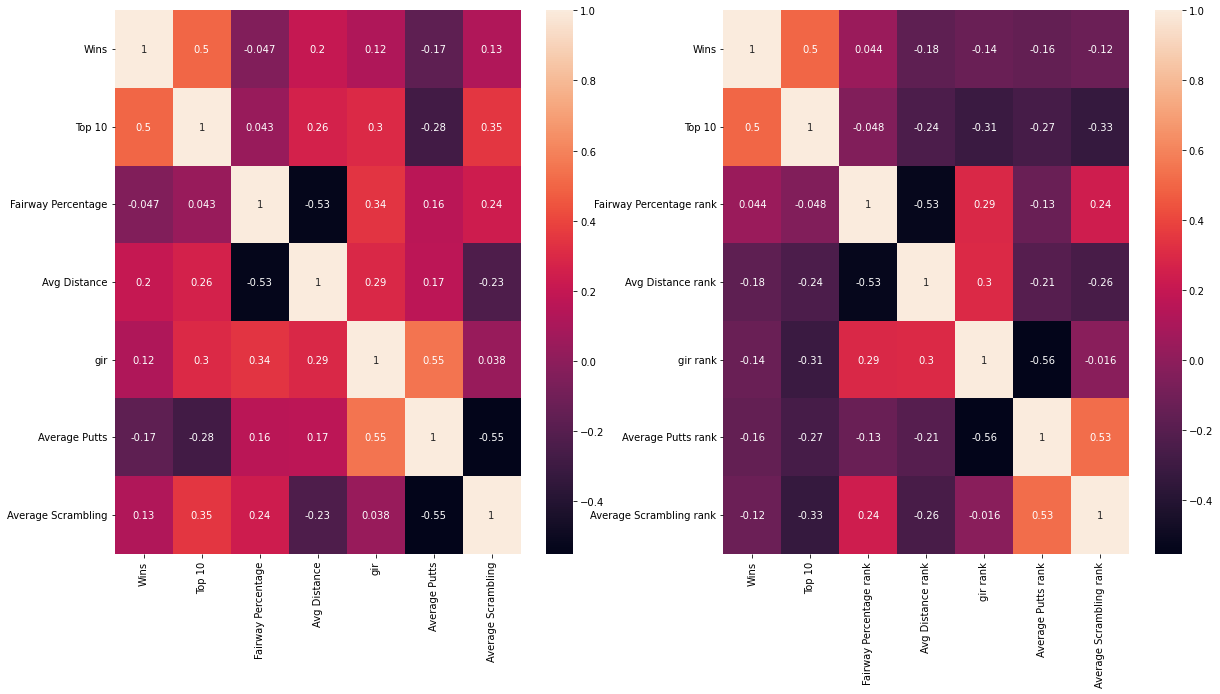

In [7]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(df[['Wins','Top 10','Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling']].corr(),ax=ax[0],annot=True)
sns.heatmap(df[['Wins','Top 10','Fairway Percentage rank', 'Avg Distance rank',
       'gir rank', 'Average Putts rank', 'Average Scrambling rank']].corr(),ax=ax[1],annot=True)

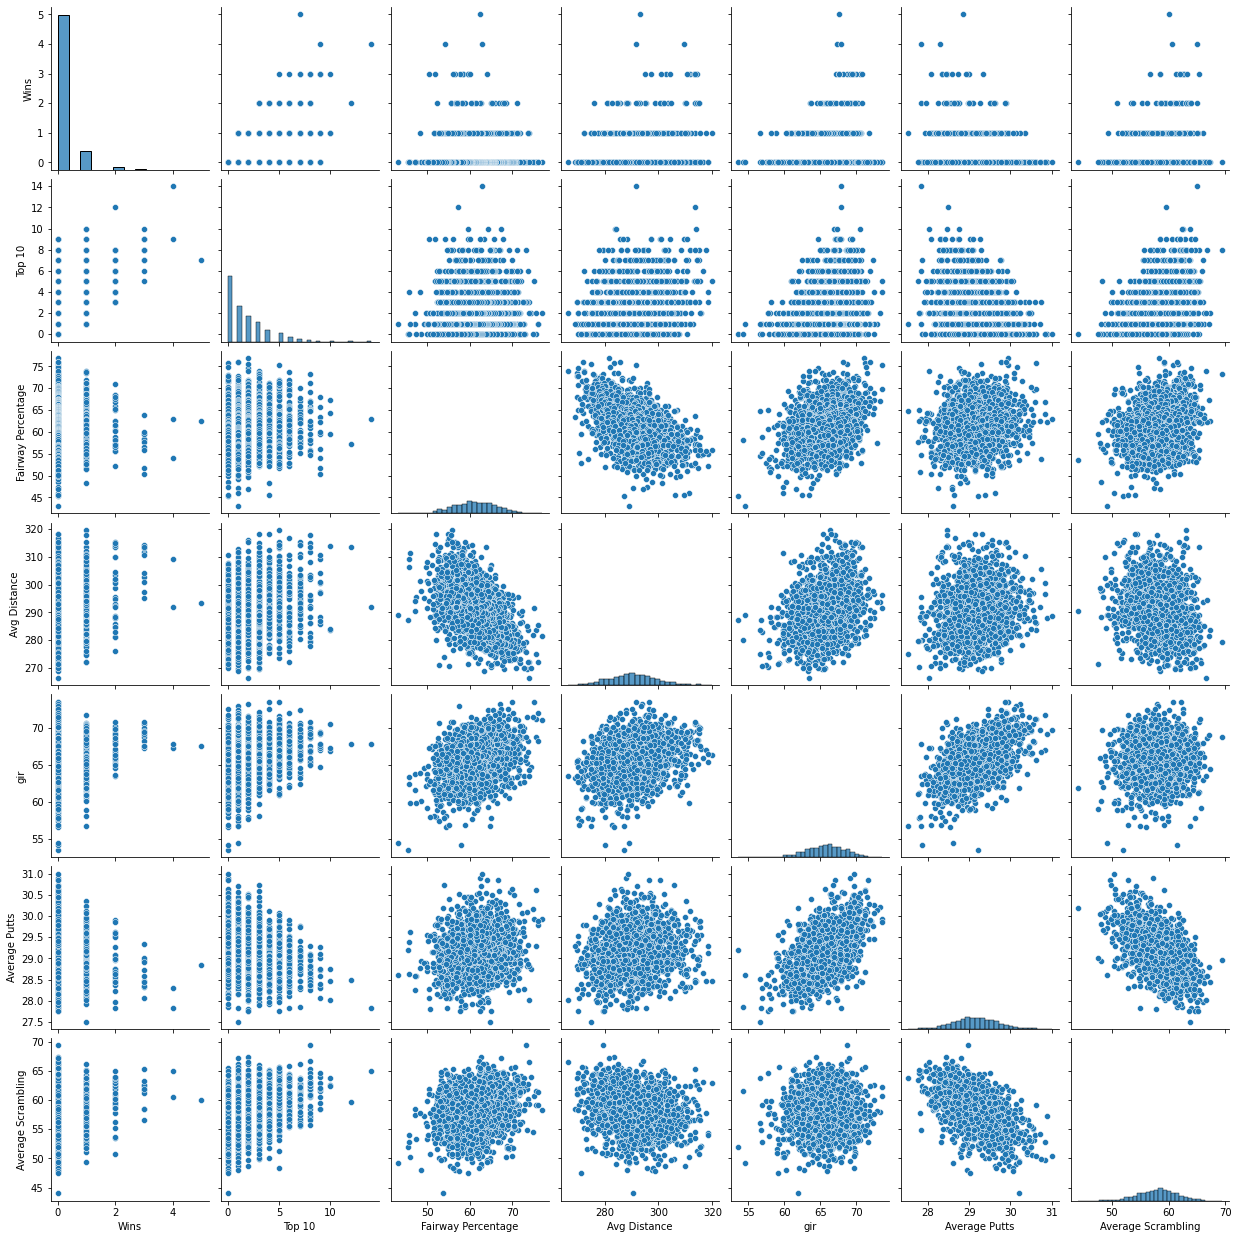

In [128]:
sns.pairplot(df[['Wins','Top 10','Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling']])

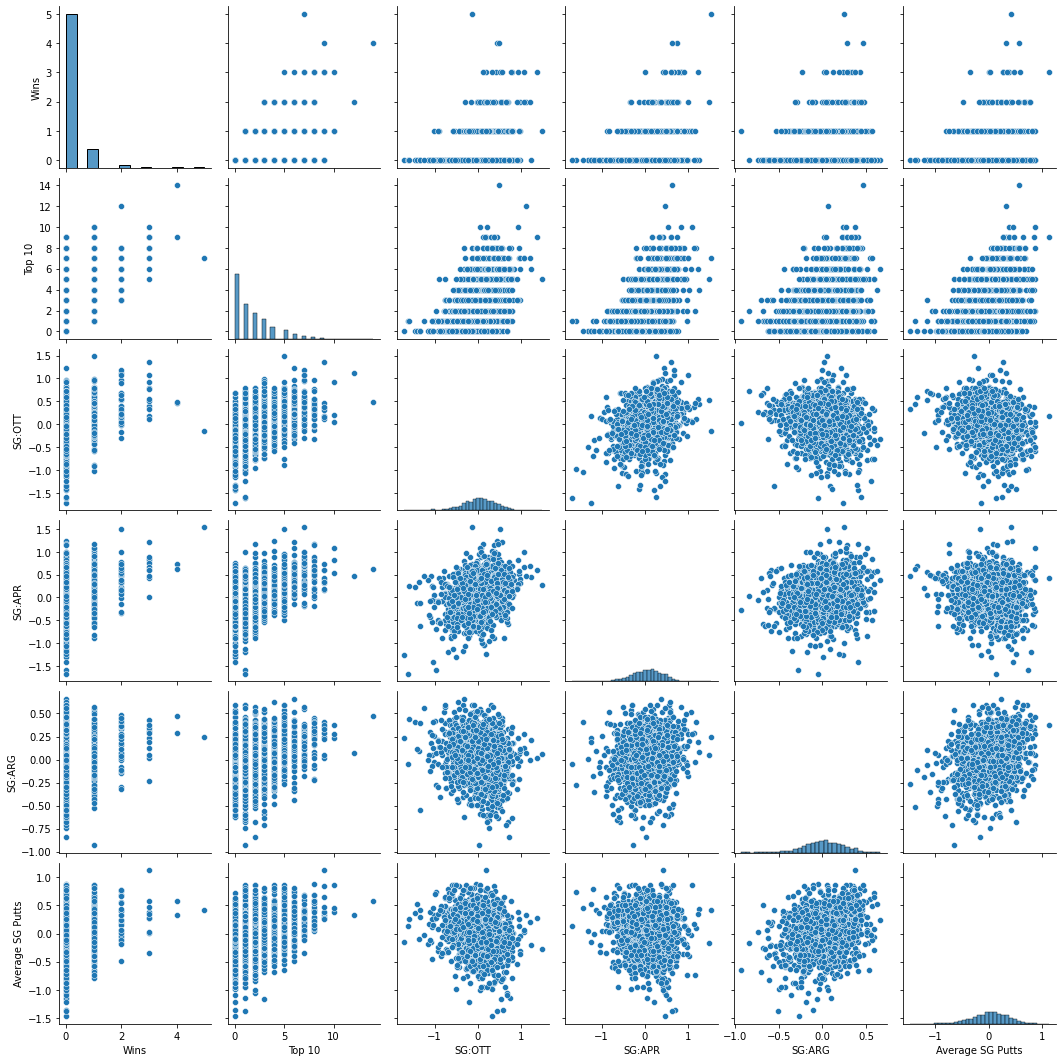

In [129]:
sns.pairplot(df[['Wins','Top 10', 'SG:OTT',
       'SG:APR', 'SG:ARG','Average SG Putts']])

In [130]:
df

Player Name  Year  Wins  Wins rank  Top 10  Top 10 rank  \
0         Henrik Stenson  2018   0.0       35.0     5.0         14.0   
1            Ryan Armour  2018   1.0        9.0     3.0         59.0   
2            Chez Reavie  2018   0.0       35.0     3.0         59.0   
3             Ryan Moore  2018   0.0       35.0     5.0         14.0   
4           Brian Stuard  2018   0.0       35.0     3.0         59.0   
...                  ...   ...   ...        ...     ...          ...   
2307        Carl Paulson  2012   0.0       32.0     0.0        154.0   
2308      Peter Tomasulo  2012   0.0       32.0     0.0        154.0   
2309        Marc Turnesa  2010   0.0       30.0     0.0        172.0   
2310     Jesper Parnevik  2010   0.0       30.0     0.0        172.0   
2311  Jim Gallagher, Jr.  2010   0.0       30.0     0.0        172.0   

      Fairway Percentage  Fairway Percentage rank  Avg Distance  \
0                  75.19                      1.0         291.5   
1                  73.58                      2.0         283.5   
2                  72.24                      3.0         286.5   
3                  71.94                      4.0         289.2   
4                  71.44                      5.0         278.9   
...                  ...                      ...           ...   
2307                 NaN                      NaN           NaN   
2308                 NaN                      NaN           NaN   
2309                 NaN                      NaN           NaN   
2310                 NaN                      NaN           NaN   
2311                 NaN                      NaN           NaN   

      Avg Distance rank  ...  SG:OTT  SG:OTT rank  SG:APR  SG:APR rank  \
0                 139.0  ...   0.427         26.0   0.960          1.0   
1                 185.0  ...  -0.012        116.0   0.213         70.0   
2                 173.0  ...   0.183         72.0   0.437         29.0   
3                 163.0  ...   0.406         29.0   0.532         16.0   
4                 193.0  ...  -0.227        155.0   0.099         84.0   
...                 ...  ...     ...          ...     ...          ...   
2307                NaN  ...     NaN          NaN     NaN          NaN   
2308                NaN  ...     NaN          NaN     NaN          NaN   
2309                NaN  ...     NaN          NaN     NaN          NaN   
2310                NaN  ...     NaN          NaN     NaN          NaN   
2311                NaN  ...     NaN          NaN     NaN          NaN   

      SG:ARG  SG:ARG rank  Average SG Putts  Average SG Putts rank  \
0     -0.027        113.0            -0.207                  157.0   
1      0.194         43.0            -0.058                  129.0   
2     -0.137        150.0             0.192                   67.0   
3      0.273         24.0            -0.271                  163.0   
4      0.026         93.0             0.164                   72.0   
...      ...          ...               ...                    ...   
2307     NaN          NaN               NaN                    NaN   
2308     NaN          NaN               NaN                    NaN   
2309     NaN          NaN               NaN                    NaN   
2310     NaN          NaN               NaN                    NaN   
2311     NaN          NaN               NaN                    NaN   

      Average SG Total  Average SG Total rank  
0                1.153                   14.0  
1                0.337                   75.0  
2                0.674                   45.0  
3                0.941                   25.0  
4                0.062                  115.0  
...                ...                    ...  
2307               NaN                    NaN  
2308               NaN                    NaN  
2309               NaN                    NaN  
2310               NaN                    NaN  
2311               NaN                    NaN  

[2312 rows x 28 columns]

<AxesSubplot:>

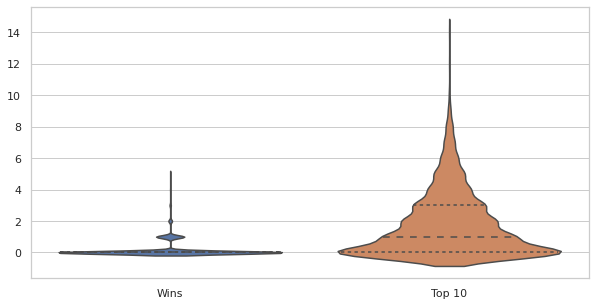

In [54]:
fig,ax = plt.subplots(figsize=(10,5))
sns.violinplot(data=df[['Wins','Top 10']],scale='count',inner='quartile',ax=ax)

In [101]:
fairway_green_scramble_pct_columns = ['Fairway Percentage', 'gir', 'Average Scrambling']
traditional_stats = ['Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts', 'Average Scrambling']
strokes_gained_stats = ['SG:OTT', 'SG:APR', 'SG:ARG','Average SG Putts']
traditional_stats_rank = [stat + ' rank' for stat in traditional_stats]
strokes_gained_stats_rank = [stat + ' rank' for stat in strokes_gained_stats]

In [51]:
sns.set_theme(style='whitegrid')

<AxesSubplot:>

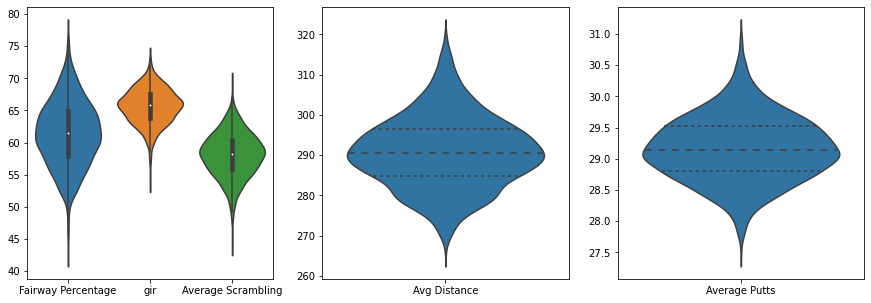

In [7]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(data=df[['Fairway Percentage', 'gir', 'Average Scrambling']],scale='count',ax=ax[0])
sns.violinplot(data=df[['Avg Distance']],inner='quartile',ax=ax[1])
sns.violinplot(data=df[['Average Putts']],inner='quartile',ax=ax[2])

<AxesSubplot:>

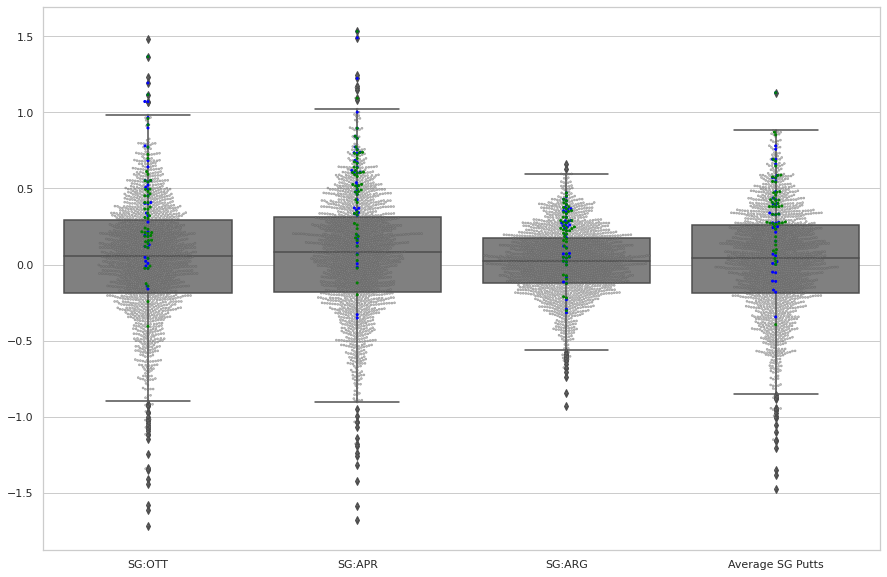

In [183]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df[strokes_gained_stats.column_names],ax=ax,color='gray')
# sns.violinplot(data=df[strokes_gained_stats],inner='quartile',scale='count',ax=ax)
sns.swarmplot(data=df[strokes_gained_stats.column_names],ax=ax,size=2,edgecolor='gray',linewidth=.5,alpha=.5,color='gray')
# sns.stripplot(data=df[df['Player Name']=='Dustin Johnson'][strokes_gained_stats],ax=ax,color='black')
# sns.swarmplot(data=df[df['Player Name']=='Dustin Johnson'][strokes_gained_stats],ax=ax,color='white',edgecolor='black',linewidth=1)
sns.swarmplot(data=df[df['Wins rank']<=3][strokes_gained_stats.column_names],ax=ax,color='blue',edgecolor='blue',linewidth=1,size=2)
sns.swarmplot(data=df[df['Top 10 rank']<=3][strokes_gained_stats.column_names],ax=ax,color='green',edgecolor='green',linewidth=1,size=2)


In [ ]:
%run '../src/clean.py'

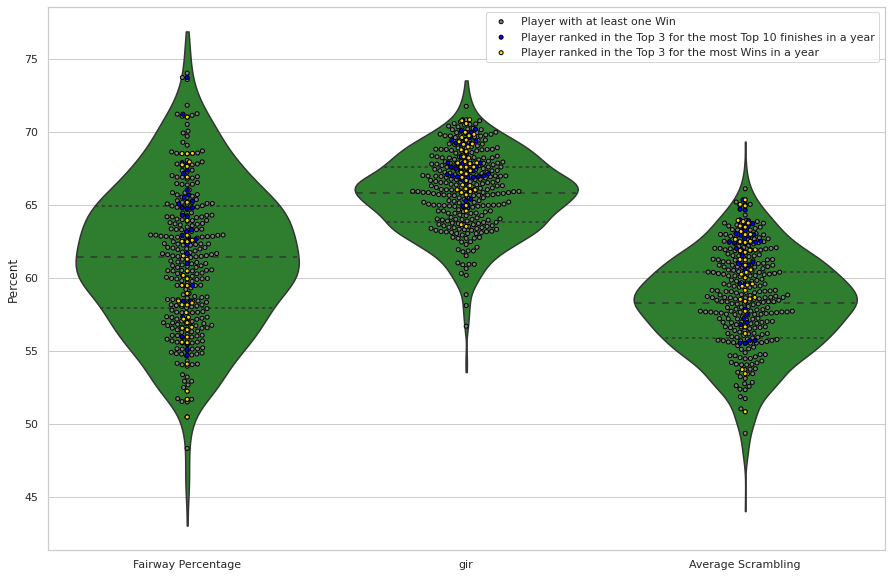

In [212]:
group = fairway_green_scramble_pct_columns
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen')
# sns.swarmplot(data=df[group.column_names],ax=ax,size=2,edgecolor='gray',linewidth=.5,alpha=.5,color='gray')
sns.swarmplot(data=df[df['Wins']>0][group.column_names],ax=ax,color='gray',edgecolor='black',linewidth=1,size=4,label='Player with at least one Win')
sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
ax.set_ylabel('Percent')
# create dictionary with labels to remove dublicates for each violin
handles,labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels,handles))
ax.legend(by_label.values(),by_label.keys())

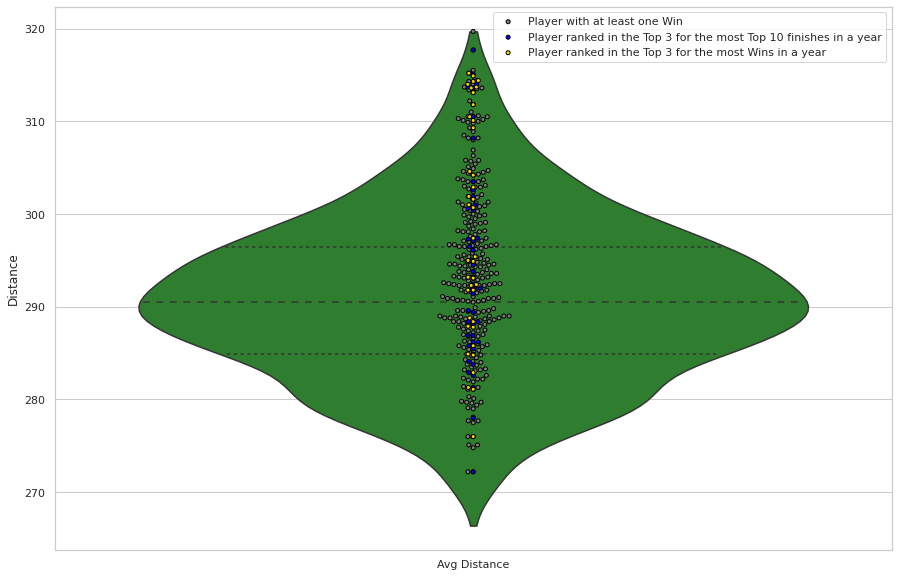

In [221]:
group = StatisticsGroup('Distance Off the Tee',['Avg Distance'])
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen')
# sns.swarmplot(data=df[group.column_names],ax=ax,size=2,edgecolor='gray',linewidth=.5,alpha=.5,color='gray')
sns.swarmplot(data=df[df['Wins']>0][group.column_names],ax=ax,color='gray',edgecolor='black',linewidth=1,size=4,label='Player with at least one Win')
sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
ax.set_ylabel('Distance')
# create dictionary with labels to remove dublicates for each violin
handles,labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels,handles))
ax.legend(by_label.values(),by_label.keys())

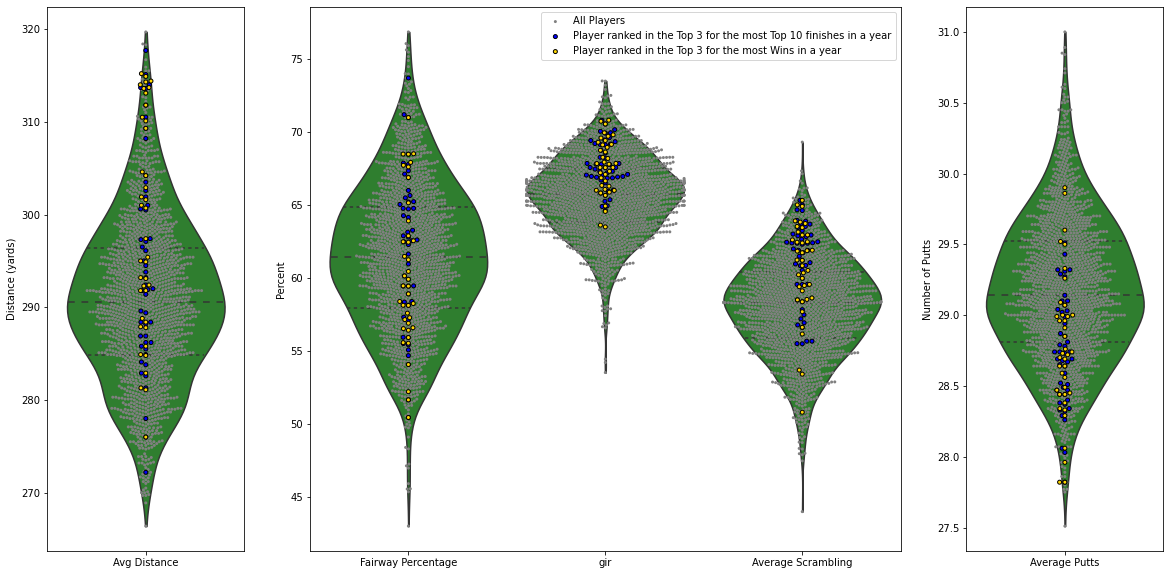

In [77]:
fig,axs = plt.subplots(1,3,figsize=(20,10),gridspec_kw={'width_ratios':[1,3,1]})
groups = [distance_off_tee_column,fairway_green_scramble_pct_columns,avg_putts_column]
for i,ax in enumerate(axs.flatten()):
    group = groups[i]
    sns.swarmplot(data=df[group.column_names],ax=ax,color='gray',size=3,label='All Players')
    sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
    sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
    sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen',label='Distribution of all Players')
    
    # sns.swarmplot(data=df[df['Wins']>0][group.column_names],ax=ax,color='gray',edgecolor='black',linewidth=1,size=4,label='Player with at least one Win')
    
axs[1].set_ylabel('Percent')
axs[0].set_ylabel('Distance (yards)')
axs[2].set_ylabel('Number of Putts')
# create dictionary with labels to remove dublicates for each violin
handles,labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels,handles))
axs[1].legend(by_label.values(),by_label.keys())

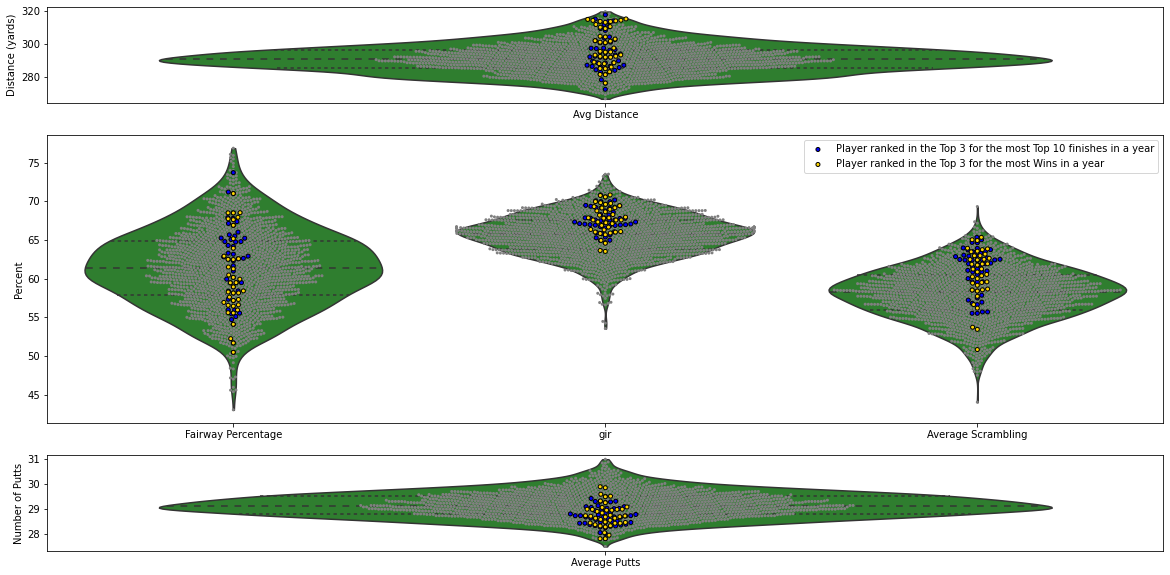

In [76]:
fig,axs = plt.subplots(3,1,figsize=(20,10),gridspec_kw={'height_ratios':[1,3,1]})
groups = [distance_off_tee_column,fairway_green_scramble_pct_columns,avg_putts_column]
for i,ax in enumerate(axs.flatten()):
    group = groups[i]
    sns.swarmplot(data=df[group.column_names],ax=ax,color='gray',size=3)
    sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
    sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
    sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen')
    
    # sns.swarmplot(data=df[df['Wins']>0][group.column_names],ax=ax,color='gray',edgecolor='black',linewidth=1,size=4,label='Player with at least one Win')
    
axs[1].set_ylabel('Percent')
axs[0].set_ylabel('Distance (yards)')
axs[2].set_ylabel('Number of Putts')
# create dictionary with labels to remove dublicates for each violin
handles,labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels,handles))
axs[1].legend(by_label.values(),by_label.keys())

In [83]:
def make_violin_top_performer_plots(df,group,orientation='v',show_legend=True):
    
    if orientation == 'v':
        figsize=(4*len(group),10)
    else:
        figsize=(12,3*len(group))
    fig,ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen',orient=orientation)
    sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Golfer ranked in the Top 3 for the most Top 10 finishes in a year',orient=orientation)
    sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Golfer ranked in the Top 3 for the most Wins in a year',orient=orientation)
    if orientation =='v':
        ax.set_xticklabels(group.proper_names)
        ax.set_ylabel(group.units)
    else:
        ax.set_yticklabels(group.proper_names)
        ax.set_xlabel(group.units)
    ax.set_title(f"Distribution of Golfers' {group.name}")
    if show_legend:
        handles,labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels,handles))
        ax.legend(by_label.values(),by_label.keys())
    fig.tight_layout()
    
    

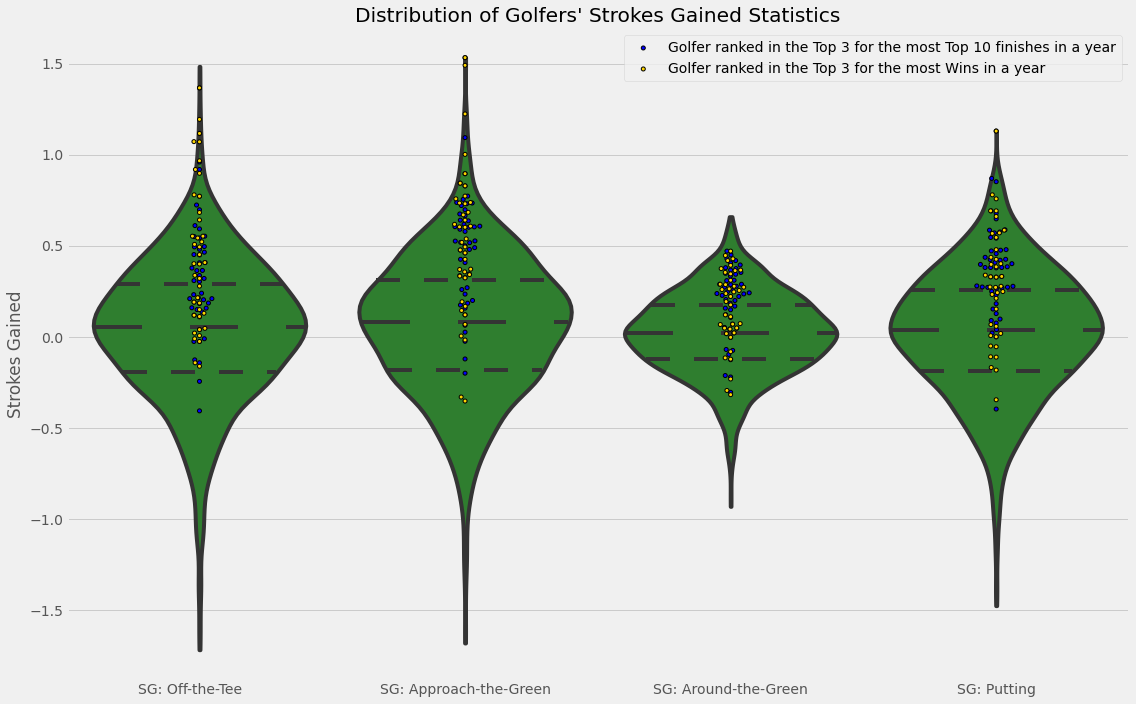

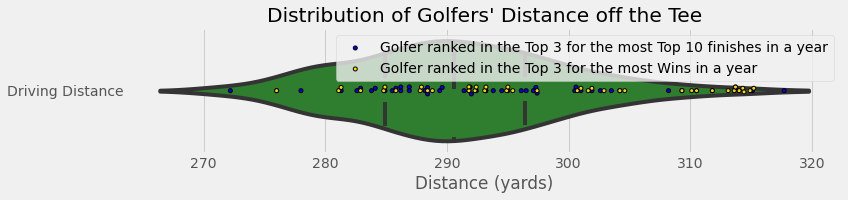

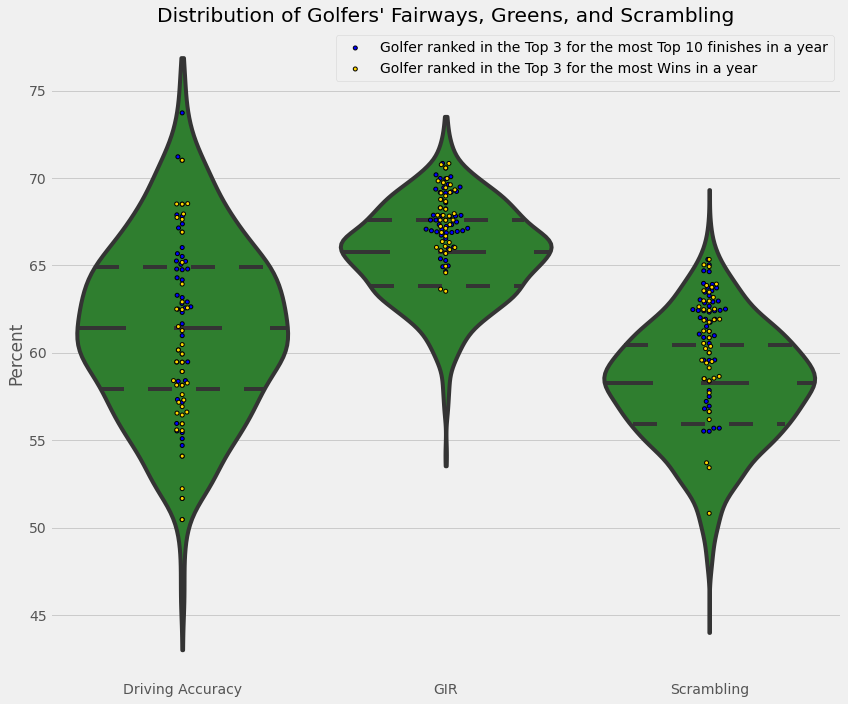

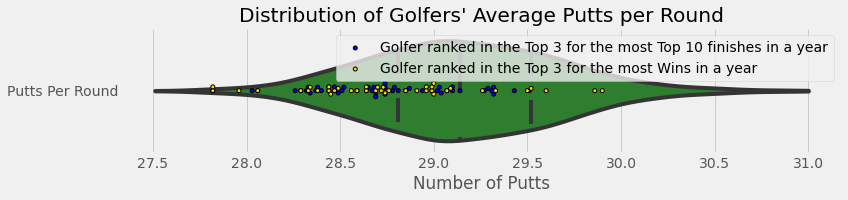

In [196]:

make_violin_top_performer_plots(df,strokes_gained_stats)
make_violin_top_performer_plots(df,distance_off_tee_column,show_legend=True,orientation='h')
make_violin_top_performer_plots(df,fairway_green_scramble_pct_columns)
make_violin_top_performer_plots(df,avg_putts_column,show_legend=True,orientation='h')

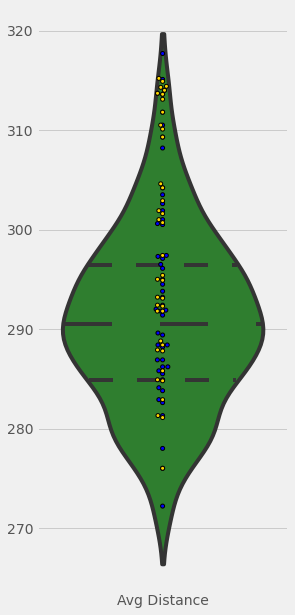

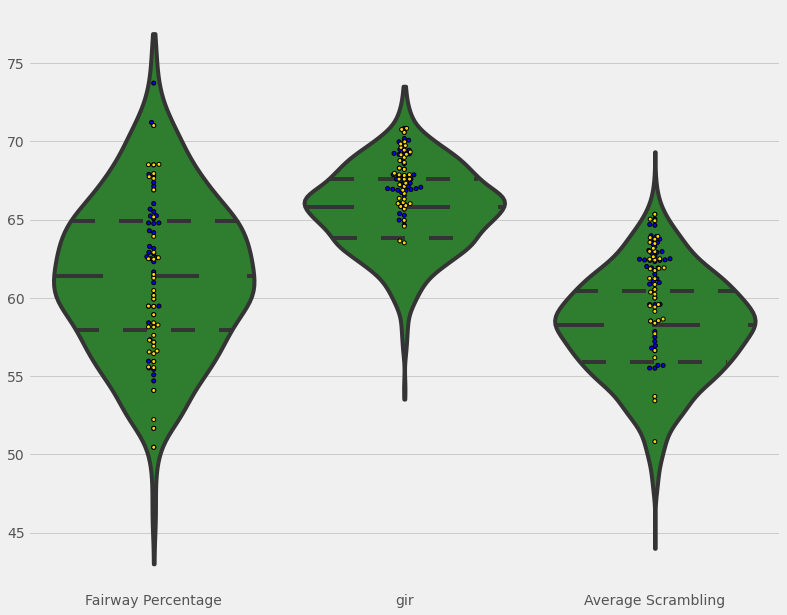

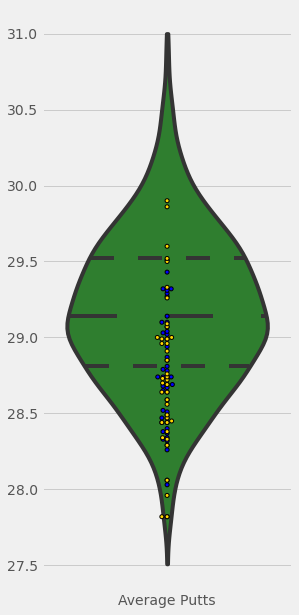

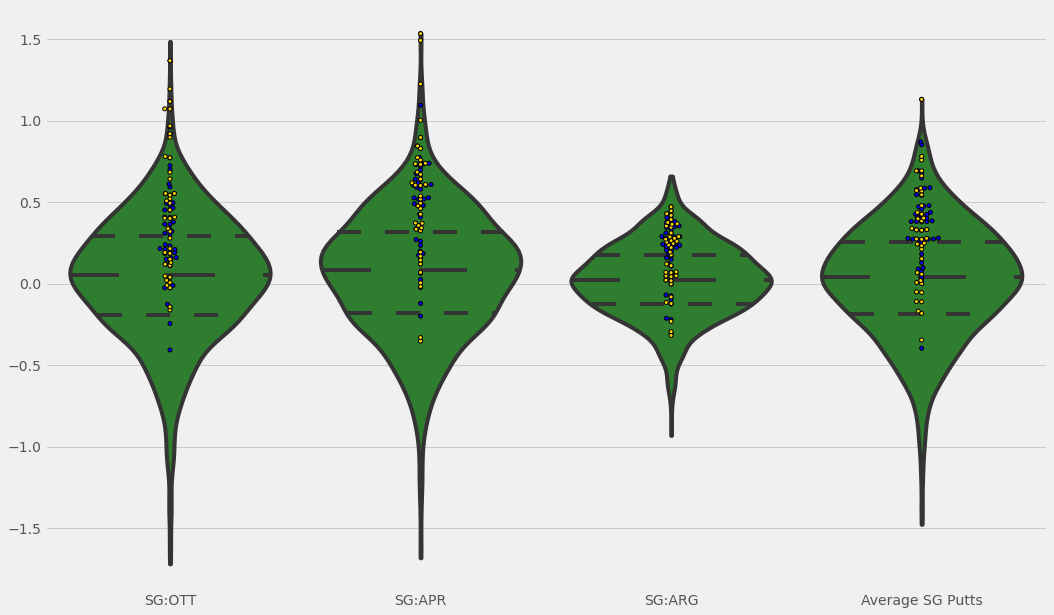

In [198]:
group = distance_off_tee_column
for group in [distance_off_tee_column,fairway_green_scramble_pct_columns,avg_putts_column,strokes_gained_stats]:
    
    fig,ax = plt.subplots(figsize=(4*len(group),10))
    sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
    sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
    sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen')



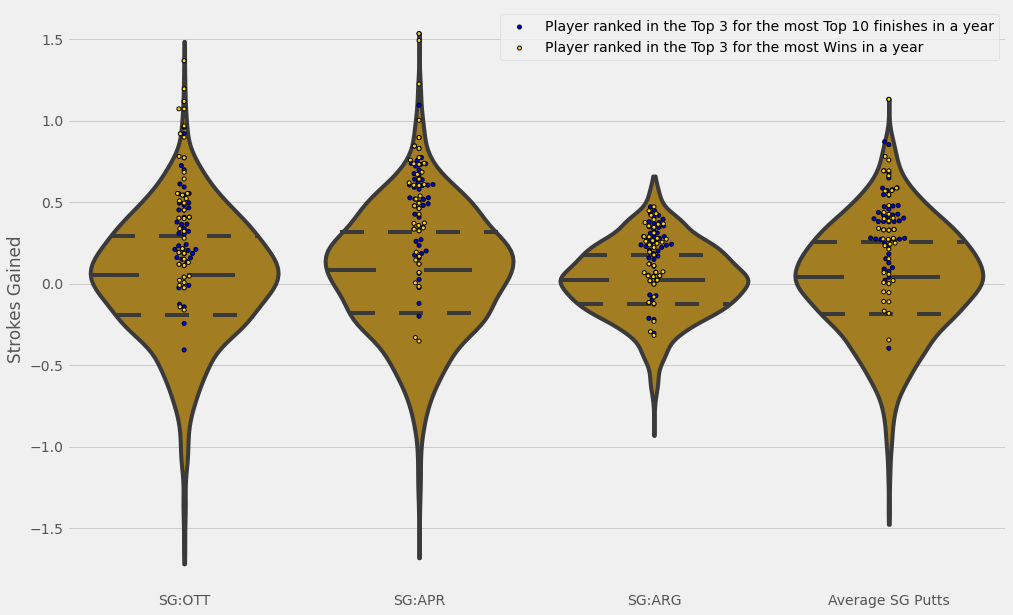

In [194]:
group = strokes_gained_stats
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='darkgoldenrod')
# sns.swarmplot(data=df[group.column_names],ax=ax,size=2,edgecolor='gray',linewidth=.5,alpha=.5,color='gray')
# sns.swarmplot(data=df[df['Wins']>0][group.column_names],ax=ax,color='gray',edgecolor='black',linewidth=1,size=4,label='Player with at least one Win')
sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
ax.set_ylabel('Strokes Gained')
# create dictionary with labels to remove dublicates for each violin
handles,labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels,handles))
ax.legend(by_label.values(),by_label.keys())


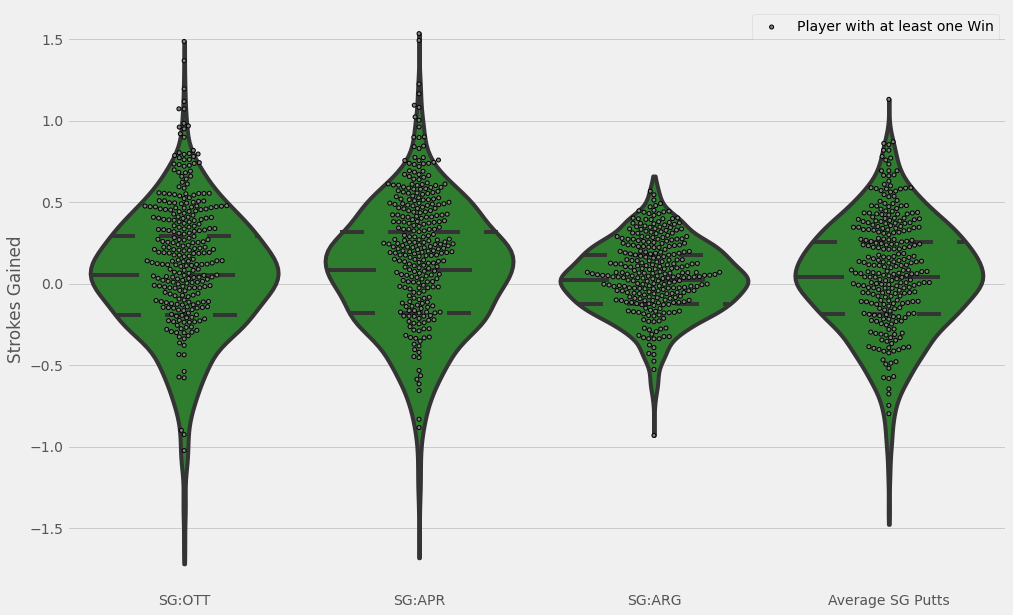

In [193]:
group = strokes_gained_stats
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=df[group.column_names],inner='quartile',cut=0,scale='count',ax=ax,color='forestgreen')
# sns.swarmplot(data=df[group.column_names],ax=ax,size=2,edgecolor='gray',linewidth=.5,alpha=.5,color='gray')
sns.swarmplot(data=df[df['Wins']>0][group.column_names],ax=ax,color='gray',edgecolor='black',linewidth=1,size=4,label='Player with at least one Win')
# sns.swarmplot(data=df[df['Top 10 rank']<=3][group.column_names],ax=ax,color='blue',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Top 10 finishes in a year')
# sns.swarmplot(data=df[df['Wins rank']<=3][group.column_names],ax=ax,color='gold',edgecolor='black',linewidth=1,size=4,label='Player ranked in the Top 3 for the most Wins in a year')
ax.set_ylabel('Strokes Gained')
# create dictionary with labels to remove dublicates for each violin
handles,labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels,handles))
ax.legend(by_label.values(),by_label.keys())


In [234]:
df[df['Wins rank']<=3].groupby('Player Name').count().Year.sort_values(ascending=False)

Player Name
Bubba Watson        4
Dustin Johnson      3
Rory McIlroy        3
Jordan Spieth       3
Justin Thomas       2
Tiger Woods         2
Steve Stricker      2
Hunter Mahan        2
Jason Day           2
Jimmy Walker        2
Martin Kaymer       1
Russell Knox        1
Phil Mickelson      1
Patrick Reed        1
Nick Watney         1
Matt Kuchar         1
Adam Scott          1
Mark Wilson         1
Keegan Bradley      1
Brandt Snedeker     1
Justin Rose         1
Jim Furyk           1
Jason Dufner        1
Hideki Matsuyama    1
Ernie Els           1
Zach Johnson        1
Name: Year, dtype: int64

In [235]:
df[df['Top 10 rank']<=3].groupby('Player Name').count().Year.sort_values(ascending=False)

Player Name
Matt Kuchar         6
Jordan Spieth       3
Dustin Johnson      3
Jason Day           3
Nick Watney         2
Justin Thomas       2
Brandt Snedeker     2
Bo Van Pelt         2
Tiger Woods         1
Steve Stricker      1
Rory McIlroy        1
Tim Clark           1
Keegan Bradley      1
Ricky Barnes        1
Tony Finau          1
Rickie Fowler       1
Retief Goosen       1
Patrick Reed        1
Luke Donald         1
Robert Streb        1
Bill Haas           1
Justin Rose         1
Billy Horschel      1
Jimmy Walker        1
Jim Furyk           1
Jeff Overton        1
Jason Dufner        1
Hideki Matsuyama    1
Ernie Els           1
Camilo Villegas     1
Bryce Molder        1
Brooks Koepka       1
Brian Harman        1
Brendon de Jonge    1
Zach Johnson        1
Name: Year, dtype: int64

In [172]:
df[(df['Top 10 rank']<=5) & (df['Wins rank']<=5)]

Player Name  Year  Wins  Wins rank  Top 10  Top 10 rank  \
32         Justin Rose  2018   2.0        4.0     8.0          2.0   
124     Dustin Johnson  2018   3.0        1.0    10.0          1.0   
137      Justin Thomas  2018   3.0        1.0     8.0          2.0   
215       Kevin Kisner  2017   1.0        5.0     7.0          4.0   
251      Rickie Fowler  2017   1.0        5.0     9.0          1.0   
265       Brian Harman  2017   1.0        5.0     7.0          4.0   
303      Jordan Spieth  2017   3.0        2.0     8.0          3.0   
309           Jon Rahm  2017   1.0        5.0     7.0          4.0   
323   Hideki Matsuyama  2017   3.0        2.0     7.0          4.0   
336     Dustin Johnson  2017   3.0        2.0     7.0          4.0   
361      Justin Thomas  2017   4.0        1.0     9.0          1.0   
520     Dustin Johnson  2016   2.0        2.0    12.0          1.0   
563          Jason Day  2016   3.0        1.0     9.0          2.0   
647      Jordan Spieth  2015   4.0        1.0    14.0          1.0   
729          Jason Day  2015   3.0        2.0     8.0          3.0   
861       Rory McIlroy  2014   3.0        1.0     9.0          2.0   
927       Jimmy Walker  2014   3.0        1.0     9.0          2.0   
946      Jordan Spieth  2013   1.0        5.0     7.0          3.0   
978     Billy Horschel  2013   1.0        5.0     7.0          3.0   
995    Brandt Snedeker  2013   2.0        2.0     8.0          2.0   
997        Tiger Woods  2013   5.0        1.0     7.0          3.0   
1005         Bill Haas  2013   1.0        5.0     9.0          1.0   
1052       Matt Kuchar  2013   2.0        2.0     7.0          3.0   
1129      Jason Dufner  2012   2.0        2.0     8.0          1.0   
1264      Rory McIlroy  2012   2.0        2.0     7.0          4.0   
1435       Nick Watney  2011   2.0        1.0     8.0          2.0   
1495         Jim Furyk  2010   2.0        1.0     6.0          3.0   
1515    Steve Stricker  2010   2.0        1.0     6.0          3.0   
1632         Ernie Els  2010   2.0        1.0     6.0          3.0   

      Fairway Percentage  Fairway Percentage rank  Avg Distance  \
32                 66.02                     33.0         303.5   
124                59.46                    125.0         314.0   
137                58.41                    138.0         311.8   
215                67.00                     23.0         288.7   
251                63.29                     59.0         300.5   
265                62.07                     73.0         289.6   
303                59.48                    111.0         295.0   
309                58.61                    117.0         305.8   
323                57.61                    130.0         302.9   
336                56.44                    144.0         314.4   
361                54.09                    169.0         309.3   
520                57.17                    138.0         313.6   
563                50.46                    181.0         304.2   
647                62.91                     80.0         291.8   
729                55.94                    162.0         313.7   
861                59.93                    108.0         310.5   
927                51.67                    176.0         301.0   
946                67.80                     18.0         289.4   
978                64.17                     50.0         293.8   
995                62.57                     67.0         281.3   
997                62.50                     69.0         293.2   
1005               62.31                     77.0         288.2   
1052               58.93                    124.0         284.9   
1129               66.90                     21.0         292.4   
1264               56.61                    156.0         310.1   
1435               58.15                    136.0         301.9   
1495               71.01                     10.0         276.0   
1515               68.50          

In [104]:
corr_strokes_gaineuniquedf[['Wins','Top 10','SG:OTT',
       'SG:APR', 'SG:ARG','Average SG Putts']].corr()
corr_strokes_gained

Wins    Top 10    SG:OTT    SG:APR    SG:ARG  \
Wins              1.000000  0.501504  0.231197  0.259151  0.135231   
Top 10            0.501504  1.000000  0.401429  0.487785  0.263291   
SG:OTT            0.231197  0.401429  1.000000  0.303073 -0.198897   
SG:APR            0.259151  0.487785  0.303073  1.000000  0.126862   
SG:ARG            0.135231  0.263291 -0.198897  0.126862  1.000000   
Average SG Putts  0.148832  0.307117 -0.218983 -0.122212  0.255924   

                  Average SG Putts  
Wins                      0.148832  
Top 10                    0.307117  
SG:OTT                   -0.218983  
SG:APR                   -0.122212  
SG:ARG                    0.255924  
Average SG Putts          1.000000

In [105]:
corr_strokes_gained.iloc[:2,2:]

SG:OTT    SG:APR    SG:ARG  Average SG Putts
Wins    0.231197  0.259151  0.135231          0.148832
Top 10  0.401429  0.487785  0.263291          0.307117

<AxesSubplot:>

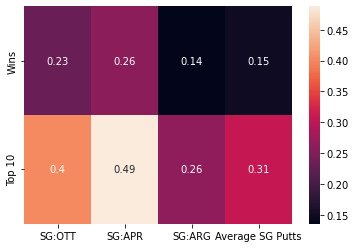

In [17]:
fig, ax = plt.subplots()
sns.heatmap(corr_strokes_gained.iloc[:2,2:],annot=True,ax=ax)

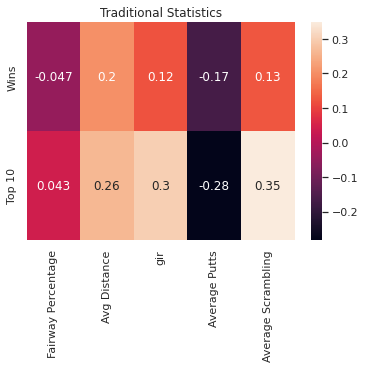

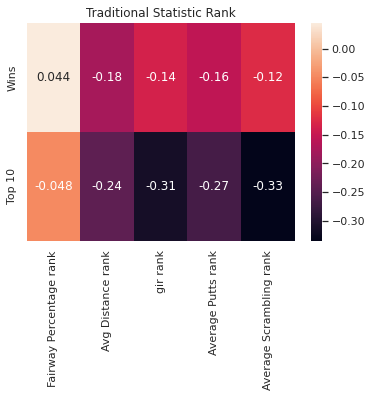

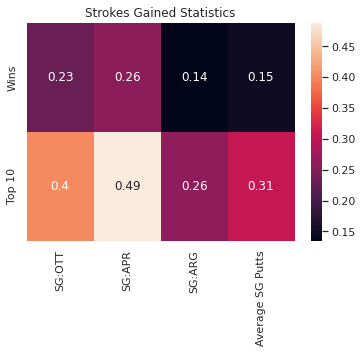

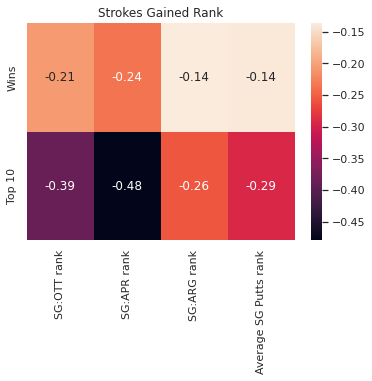

In [111]:
statistical_group_names = {'Traditional Statistics':traditional_stats,'Traditional Statistic Rank':traditional_stats_rank, 'Strokes Gained Statistics': strokes_gained_stats, 'Strokes Gained Rank': strokes_gained_stats_rank}

for group,columns in statistical_group_names.items():
    corr = df[['Wins','Top 10']+columns].corr()
    fig,ax = plt.subplots()
    sns.heatmap(corr.iloc[:2,2:], annot=True,ax=ax)
    ax.set_title(group)


In [26]:
# could also use class
class StatisticsGroup(object):
    _columns_of_interest = ['Player Name', 'Year', 'Wins', 'Top 10', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Scrambling', 'Average Putts', 'Average Score', 'SG:OTT', 'SG:APR', 'SG:ARG', 'Average SG Putts', 'Average SG Total']
    _proper_column_names = ['Player Name','Year','Wins','Top 10 Finishes','Driving Accuracy','Driving Distance','GIR','Scrambling','Putts Per Round','Scoring Average    ','SG: Off-the-Tee    ','SG: Approach-the-Green','SG: Around-the-Green','SG: Putting','SG: Total']
    _proper_name_dict = dict(zip(_columns_of_interest,_proper_column_names))
    
    def __init__(self,name=None,statistics_column_names=[],units=None):
        self.name = name
        self.column_names = statistics_column_names
        self.proper_names = self.__get_proper_names()
        self.units = units
        
    def __len__(self):
        return len(self.column_names)
    
    def __get_proper_names(self):
        return [self._proper_name_dict[col] for col in self.column_names]

traditional_stats = StatisticsGroup('Traditional Statistics',['Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts', 'Average Scrambling'])
strokes_gained_stats = StatisticsGroup('Strokes Gained Statistics',['SG:OTT', 'SG:APR', 'SG:ARG','Average SG Putts'],'Strokes Gained')
# traditional_stats_rank = StatisticsGroup('Traditional Statistic Rank',[stat + ' rank' for stat in traditional_stats.column_names])
# strokes_gained_stats_rank = StatisticsGroup('Strokes Gained Ranks',[stat + ' rank' for stat in strokes_gained_stats.column_names])
fairway_green_scramble_pct_columns = StatisticsGroup('Fairways, Greens, and Scrambling',['Fairway Percentage', 'gir', 'Average Scrambling'],'Percent')
distance_off_tee_column = StatisticsGroup('Distance off the Tee',['Avg Distance'],'Distance (yards)')
avg_putts_column = StatisticsGroup('Average Putts per Round', ['Average Putts'],'Number of Putts')

In [27]:
traditional_stats.units

In [154]:
# using classes
def make_win_top10_heatmaps(df,group):
    '''
    Make win and top 10 heatmaps of the specified statistical group
    INPUT - df - data frame, group - statistics group class obj
    '''
    corr = df[['Wins','Top 10']+group.column_names].corr()
    fig,ax = plt.subplots()
    sns.heatmap(corr.iloc[:2,2:], annot=True,ax=ax)
    ax.set_title(group.name)
    fig.tight_layout()


In [208]:
df['Top 10 rank']<=3 

0       False
1       False
2       False
3       False
4       False
        ...  
2307    False
2308    False
2309    False
2310    False
2311    False
Name: Top 10 rank, Length: 2312, dtype: bool

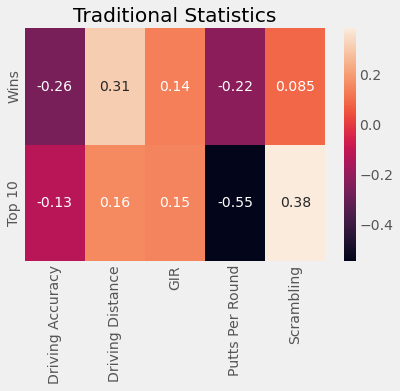

In [209]:
# using classes
def make_win_top10_heatmaps(df,group,just_top_performers=False):
    '''
    Make win and top 10 heatmaps of the specified statistical group
    INPUT - df - data frame, group - statistics group class obj
            just_top_performers - bool - if true then the correlation will only be between players ranked in the top 3 for wins or top 10s in a year
    '''
    if just_top_performers:
        df = df[(df['Wins rank']<=3) | (df['Top 10 rank']<=3)]
    corr = df[['Wins','Top 10']+group.column_names].corr()
    fig,ax = plt.subplots()
    sns.heatmap(corr.iloc[:2,2:], annot=True,ax=ax)
    ax.set_title(group.name)
    ax.set_xticklabels(group.proper_names)
        
make_win_top10_heatmaps(df,traditional_stats)

In [159]:
traditional_stats.name.replace(' ','_')

'Traditional_Statistics'

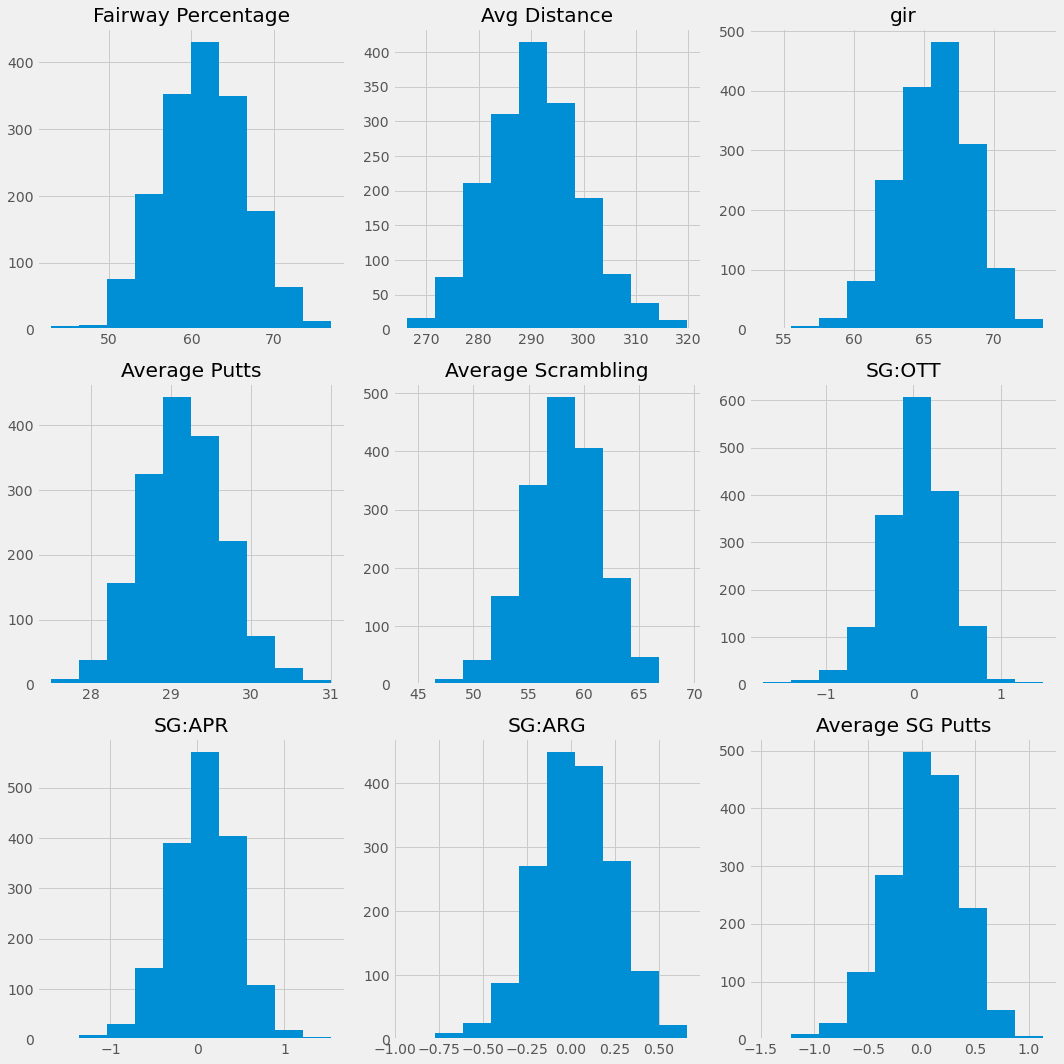

In [191]:

df[traditional_stats.column_names + strokes_gained_stats.column_names].hist(figsize=(15,15))
plt.tight_layout()

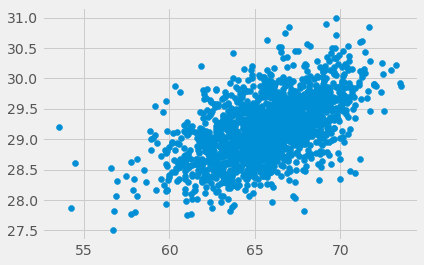

In [190]:
fig,ax = plt.subplots()
ax.scatter(df.gir,df['Average Putts'])


In [104]:
top_wins_mask = df['Wins rank']<=3
top_top10s_mask = df['Top 10 rank']<=3

In [112]:
set_trasparency_to=0.5
fig,axs = plt.subplots(1,2,sharey=True,figsize=(10,5))
df.plot.scatter('gir','Average Putts',ax=axs[0],alpha=set_trasparency_to)
df[top_top10s_mask].plot.scatter('gir','Average Putts',ax=axs[0],alpha=set_trasparency_to,color='blue')
df[top_wins_mask].plot.scatter('gir','Average Putts',ax=axs[0],alpha=set_trasparency_to,color='gold',ec='black')
axs[0].set_xlabel('GIR')
axs[0].set_ylabel('Average Putts per Round')
df.plot.scatter('Average Scrambling','Average Putts',ax=axs[1],alpha=set_trasparency_to)
df[top_top10s_mask].plot.scatter('Average Scrambling','Average Putts',ax=axs[1],alpha=set_trasparency_to,color='blue')
df[top_wins_mask].plot.scatter('Average Scrambling','Average Putts',ax=axs[1],alpha=set_trasparency_to,color='gold',ec='black')

axs[1].set_xlabel('Scrambling')


fig.suptitle('Dependency between Traditional Statistics')
fig.tight_layout()

fig,axs = plt.subplots(1,2,sharey=True,figsize=(10,5))
df.plot.scatter('SG:APR','Average SG Putts',ax=axs[0],alpha=set_trasparency_to)
axs[0].set_xlabel('SG: Approach-the-Green')
axs[0].set_ylabel('SG: Putting')
df.plot.scatter('SG:ARG','Average SG Putts',ax=axs[1],alpha=set_trasparency_to)
axs[1].set_xlabel('SG: Around-the-Green')
fig.suptitle('Dependency between Strokes Gained Statistics')
fig.tight_layout()

In [180]:
def make_double_scatter_plot(df,xcols,ycol,alpha=1,with_top_performers=True,title=None,show_legend=True):
    columns_of_interest = ['Player Name', 'Year', 'Wins', 'Top 10', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Scrambling', 'Average Putts', 'Average Score', 'SG:OTT', 'SG:APR', 'SG:ARG', 'Average SG Putts', 'Average SG Total']
    proper_column_names = ['Player Name','Year','Wins','Top 10 Finishes','Driving Accuracy','Driving Distance','GIR','Scrambling','Putts Per Round','Scoring Average    ','SG: Off-the-Tee    ','SG: Approach-the-Green','SG: Around-the-Green','SG: Putting','SG: Total']
    proper_name_dict = dict(zip(columns_of_interest,proper_column_names))
    fig,axs = plt.subplots(1,2,sharey=True,figsize=(10,5))
    for i in range(2):
        df.plot.scatter(xcols[i],ycol,ax=axs[i],alpha=alpha)
        if with_top_performers:
            top_wins_mask = df['Wins rank']<=3
            top_top10s_mask = df['Top 10 rank']<=3
            df[top_top10s_mask].plot.scatter(xcols[i],ycol,ax=axs[i],alpha=alpha,color='darkblue',ec='black',label='Most Top 10s')
            df[top_wins_mask].plot.scatter(xcols[i],ycol,ax=axs[i],alpha=alpha,color='gold',ec='black',label='Most Wins')
        axs[i].set_xlabel(proper_name_dict[xcols[i]])
    axs[0].set_ylabel(proper_name_dict[ycol])
    if with_top_performers:
        axs[0].legend().set_visible(False)
        axs[1].legend().set_visible(show_legend)
        if show_legend:
            axs[1].legend(loc='upper left')
    fig.suptitle(title)
    fig.tight_layout()
    return fig,axs
    
    

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:xlabel='SG: Approach-the-Green', ylabel='SG: Putting'>,
        <AxesSubplot:xlabel='SG: Around-the-Green', ylabel='Average SG Putts'>],
       dtype=object))

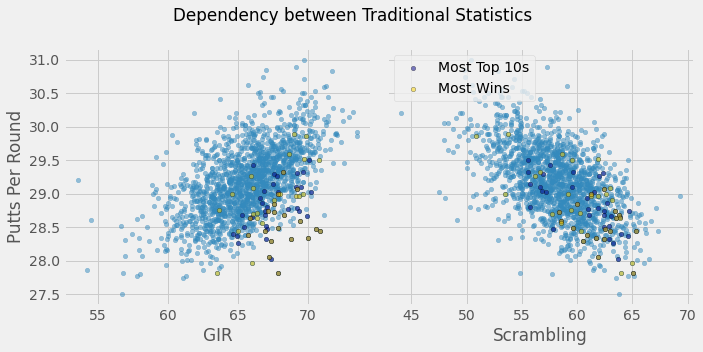

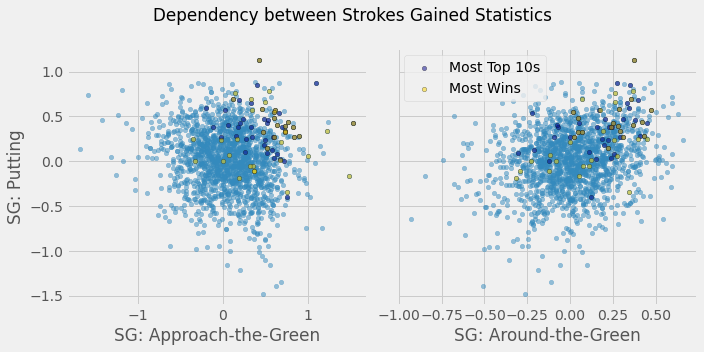

In [189]:
make_double_scatter_plot(df,['gir','Average Scrambling'],'Average Putts',alpha=.5,title='Dependency between Traditional Statistics',with_top_performers=True)    
make_double_scatter_plot(df,['SG:APR','SG:ARG'],'Average SG Putts',alpha=.5,title='Dependency between Strokes Gained Statistics',show_legend=True)    